In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
import pandas as pd

gold_data = pd.read_csv('~/Desktop/dataproyects/gold_and_silver_prices/gold_prices.csv')
silver_data = pd.read_csv('~/Desktop/dataproyects/gold_and_silver_prices/silver_prices.csv')


In [12]:
gold_data.head()

Date  Close/Last    Volume    Open    High     Low
0  08/17/2023      1915.2  146770.0  1922.4  1933.5  1914.2
1  08/16/2023      1928.3  124766.0  1933.1  1938.2  1922.0
2  08/15/2023      1935.2  161512.0  1939.4  1944.3  1927.5
3  08/14/2023      1944.0  117514.0  1945.6  1948.2  1934.2
4  08/11/2023      1946.6  119090.0  1944.9  1953.6  1942.7

In [13]:
gold_data.describe()

Close/Last         Volume         Open         High          Low
count  2539.000000    2511.000000  2539.000000  2539.000000  2539.000000
mean   1467.437456  183765.289128  1467.455967  1477.035880  1457.630721
std     282.891621   98028.942525   283.126968   285.232942   280.366732
min    1049.600000       1.000000  1051.500000  1062.700000  1045.400000
25%    1243.900000  123166.500000  1243.850000  1251.250000  1235.800000
50%    1321.400000  172127.000000  1321.700000  1329.300000  1314.000000
75%    1774.050000  233415.000000  1773.950000  1785.000000  1763.550000
max    2069.400000  787217.000000  2076.400000  2085.400000  2049.000000

In [15]:
silver_data.head()

Date  Close/Last   Volume    Open    High     Low
0  08/17/2023      23.042  11441.0  22.800  23.385  22.725
1  08/16/2023      22.856  10802.0  22.905  23.170  22.770
2  08/15/2023      22.656  60396.0  22.650  22.770  22.265
3  08/14/2023      22.708  51908.0  22.740  22.820  22.410
4  08/11/2023      22.743  48043.0  22.760  22.910  22.610

In [7]:
silver_data.describe()

Close/Last         Volume         Open         High          Low
count  2539.000000    2476.000000  2539.000000  2539.000000  2539.000000
mean     19.132079   56836.897819    19.142883    19.360299    18.905609
std       3.750198   31718.237093     3.762177     3.826964     3.672283
min      11.772000       1.000000    11.975000    12.330000    11.640000
25%      16.265000   38002.500000    16.257500    16.427500    16.107500
50%      17.815000   53604.000000    17.850000    18.010000    17.665000
75%      22.104500   71269.500000    22.195000    22.475000    21.847500
max      29.418000  347002.000000    29.235000    30.350000    28.300000

In [16]:
silver_data['Gold/Silver']=0
gold_data['Gold/Silver']=1

all_data = pd.concat([silver_data, gold_data])

In [17]:
all_data

Date  Close/Last    Volume      Open      High       Low  \
0     08/17/2023      23.042   11441.0    22.800    23.385    22.725   
1     08/16/2023      22.856   10802.0    22.905    23.170    22.770   
2     08/15/2023      22.656   60396.0    22.650    22.770    22.265   
3     08/14/2023      22.708   51908.0    22.740    22.820    22.410   
4     08/11/2023      22.743   48043.0    22.760    22.910    22.610   
...          ...         ...       ...       ...       ...       ...   
2534  08/23/2013    1395.800  149116.0  1376.100  1399.900  1367.800   
2535  08/22/2013    1370.800  134493.0  1365.600  1381.400  1354.500   
2536  08/21/2013    1370.100  137350.0  1371.000  1378.900  1359.200   
2537  08/20/2013    1372.600  130096.0  1364.900  1378.000  1351.600   
2538  08/19/2013    1365.700  116056.0  1377.100  1384.100  1362.000   

      Gold/Silver  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
2534            1  
2535            1  
2536            1  
2537            1  
2538            1  

[5078 rows x 7 columns]

In [18]:
all_data['OpenMinusClose'] = all_data['Open']-all_data['Close/Last']
all_data.head()

Date  Close/Last   Volume    Open    High     Low  Gold/Silver  \
0  08/17/2023      23.042  11441.0  22.800  23.385  22.725            0   
1  08/16/2023      22.856  10802.0  22.905  23.170  22.770            0   
2  08/15/2023      22.656  60396.0  22.650  22.770  22.265            0   
3  08/14/2023      22.708  51908.0  22.740  22.820  22.410            0   
4  08/11/2023      22.743  48043.0  22.760  22.910  22.610            0   

   OpenMinusClose  
0          -0.242  
1           0.049  
2          -0.006  
3           0.032  
4           0.017

In [19]:
all_data['Daily_mean'] = all_data[['Open', 'Close/Last', 'High', 'Low']].mean(axis=1)

In [20]:
print(all_data.head())

         Date  Close/Last   Volume    Open    High     Low  Gold/Silver  \
0  08/17/2023      23.042  11441.0  22.800  23.385  22.725            0   
1  08/16/2023      22.856  10802.0  22.905  23.170  22.770            0   
2  08/15/2023      22.656  60396.0  22.650  22.770  22.265            0   
3  08/14/2023      22.708  51908.0  22.740  22.820  22.410            0   
4  08/11/2023      22.743  48043.0  22.760  22.910  22.610            0   

   OpenMinusClose  Daily_mean  
0          -0.242    22.98800  
1           0.049    22.92525  
2          -0.006    22.58525  
3           0.032    22.66950  
4           0.017    22.75575  


In [21]:
all_data['Date'].dtype

dtype('O')

In [22]:
missing_values_count = all_data.isnull().sum()
missing_values_count

Date               0
Close/Last         0
Volume            91
Open               0
High               0
Low                0
Gold/Silver        0
OpenMinusClose     0
Daily_mean         0
dtype: int64

In [23]:
all_data[all_data['Volume'].isnull()]

Date  Close/Last  Volume      Open      High       Low  \
839   04/17/2020      15.237     NaN    15.237    15.237    15.237   
843   04/13/2020      15.479     NaN    15.479    15.479    15.479   
881   02/18/2020      18.131     NaN    18.131    18.131    18.131   
882   02/14/2020      17.715     NaN    17.715    17.715    17.715   
940   11/20/2019      17.100     NaN    17.100    17.100    17.100   
...          ...         ...     ...       ...       ...       ...   
2441  01/01/2014    1202.300     NaN  1202.300  1202.300  1202.300   
2446  12/25/2013    1203.300     NaN  1203.300  1203.300  1203.300   
2465  11/28/2013    1237.900     NaN  1237.900  1237.900  1237.900   
2486  10/30/2013    1349.300     NaN  1343.100  1349.300  1349.300   
2528  09/02/2013    1396.100     NaN  1396.100  1396.100  1396.100   

      Gold/Silver  OpenMinusClose  Daily_mean  
839             0             0.0      15.237  
843             0             0.0      15.479  
881             0             0.0      18.131  
882             0             0.0      17.715  
940             0             0.0      17.100  
...           ...             ...         ...  
2441            1             0.0    1202.300  
2446            1             0.0    1203.300  
2465            1             0.0    1237.900  
2486            1            -6.2    1347.750  
2528            1             0.0    1396.100  

[91 rows x 9 columns]

In [24]:
all_data = all_data.fillna(0)

In [25]:
all_data['Date']= pd.to_datetime(all_data['Date'], infer_datetime_format=True)

In [26]:
all_data['year'] = all_data['Date'].dt.year.astype(int)
all_data['month'] = all_data['Date'].dt.month.astype(int)
all_data['day'] = all_data['Date'].dt.day.astype(int)
all_data.head()

Date  Close/Last   Volume    Open    High     Low  Gold/Silver  \
0 2023-08-17      23.042  11441.0  22.800  23.385  22.725            0   
1 2023-08-16      22.856  10802.0  22.905  23.170  22.770            0   
2 2023-08-15      22.656  60396.0  22.650  22.770  22.265            0   
3 2023-08-14      22.708  51908.0  22.740  22.820  22.410            0   
4 2023-08-11      22.743  48043.0  22.760  22.910  22.610            0   

   OpenMinusClose  Daily_mean  year  month  day  
0          -0.242    22.98800  2023      8   17  
1           0.049    22.92525  2023      8   16  
2          -0.006    22.58525  2023      8   15  
3           0.032    22.66950  2023      8   14  
4           0.017    22.75575  2023      8   11

In [33]:
corr_matrix = all_data.corr(numeric_only=True)

In [35]:
custom_color = ['#68228B']

Text(0.5, 1.02, 'Correlation Matrix of all')

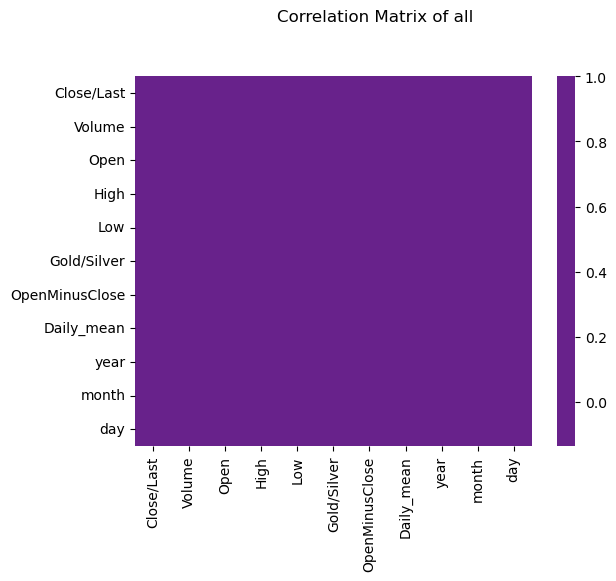

In [36]:
sns.heatmap(corr_matrix, cmap=custom_color)
plt.suptitle('Correlation Matrix of all', y=1.02)

In [37]:
numerical_vars = all_data.select_dtypes(exclude = 'object')
categorical_vars = all_data.select_dtypes(exclude = ['int64','float64'])

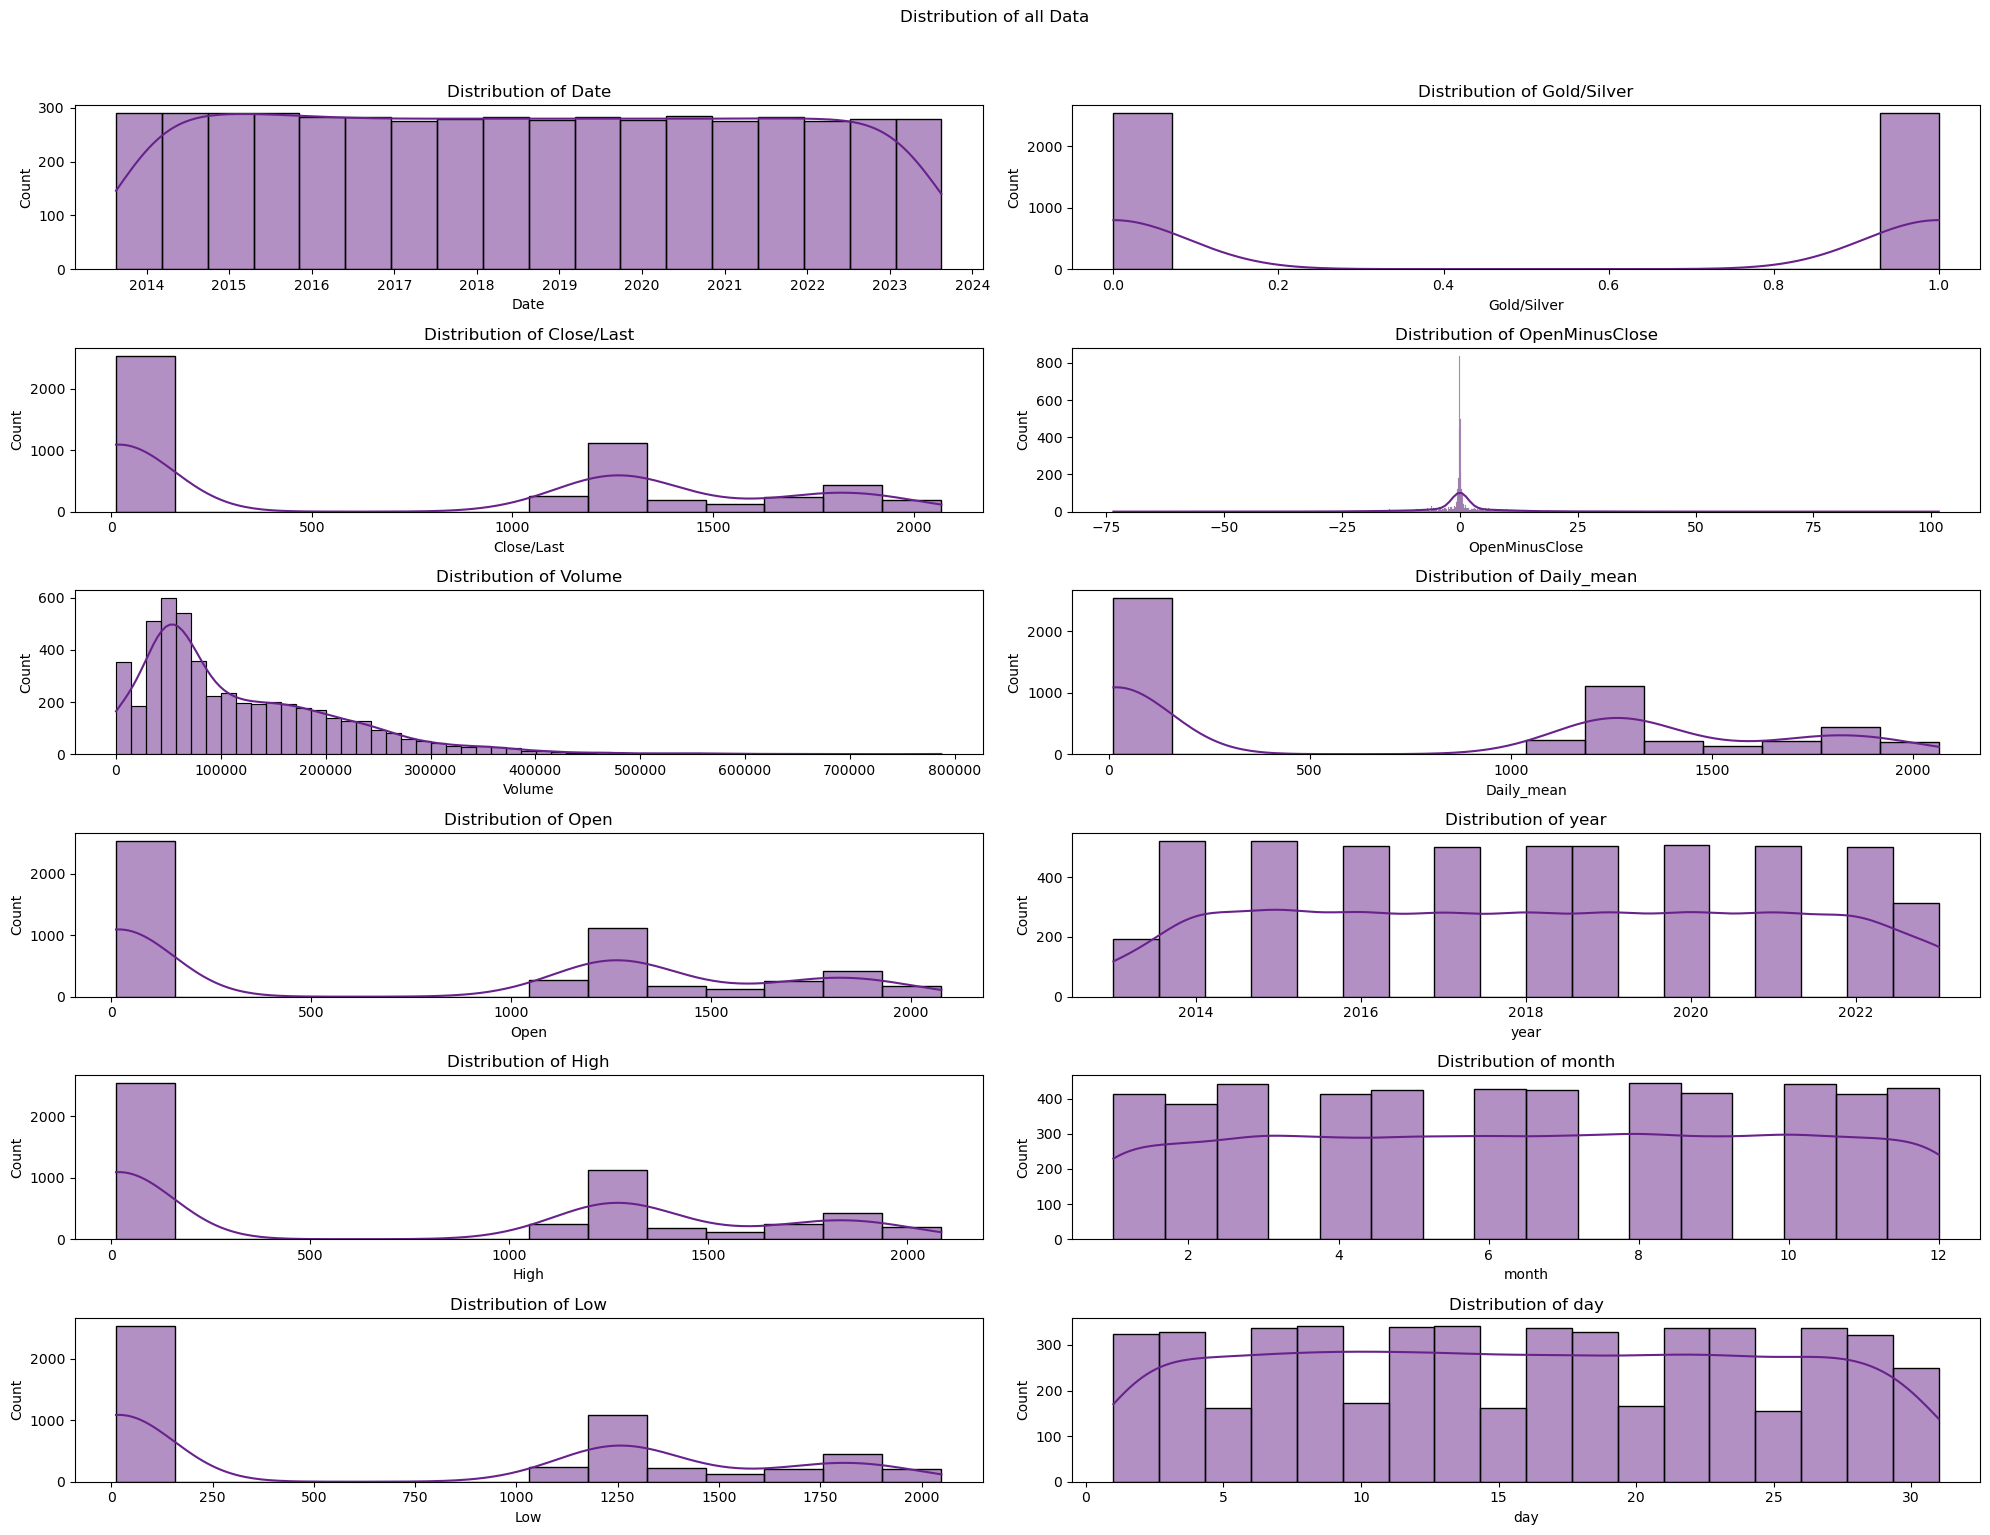

In [38]:
fig, axis = plt.subplots(6,2,figsize = (20,15))
for i, col in enumerate(numerical_vars.columns):
    if i < 6:
        j = 0    
        sns.histplot(x = all_data[col], kde = True, ax = axis[i,j], color = '#68228B')
        axis[i,j].set_title("Distribution of " + col)
    else:
        i = i - 6
        j = 1
        sns.histplot(x = all_data[col],kde = True, ax = axis[i,j], color = '#68228B')
        axis[i,j].set_title("Distribution of " + col)
plt.suptitle('Distribution of all Data', y=1.02)
plt.tight_layout()

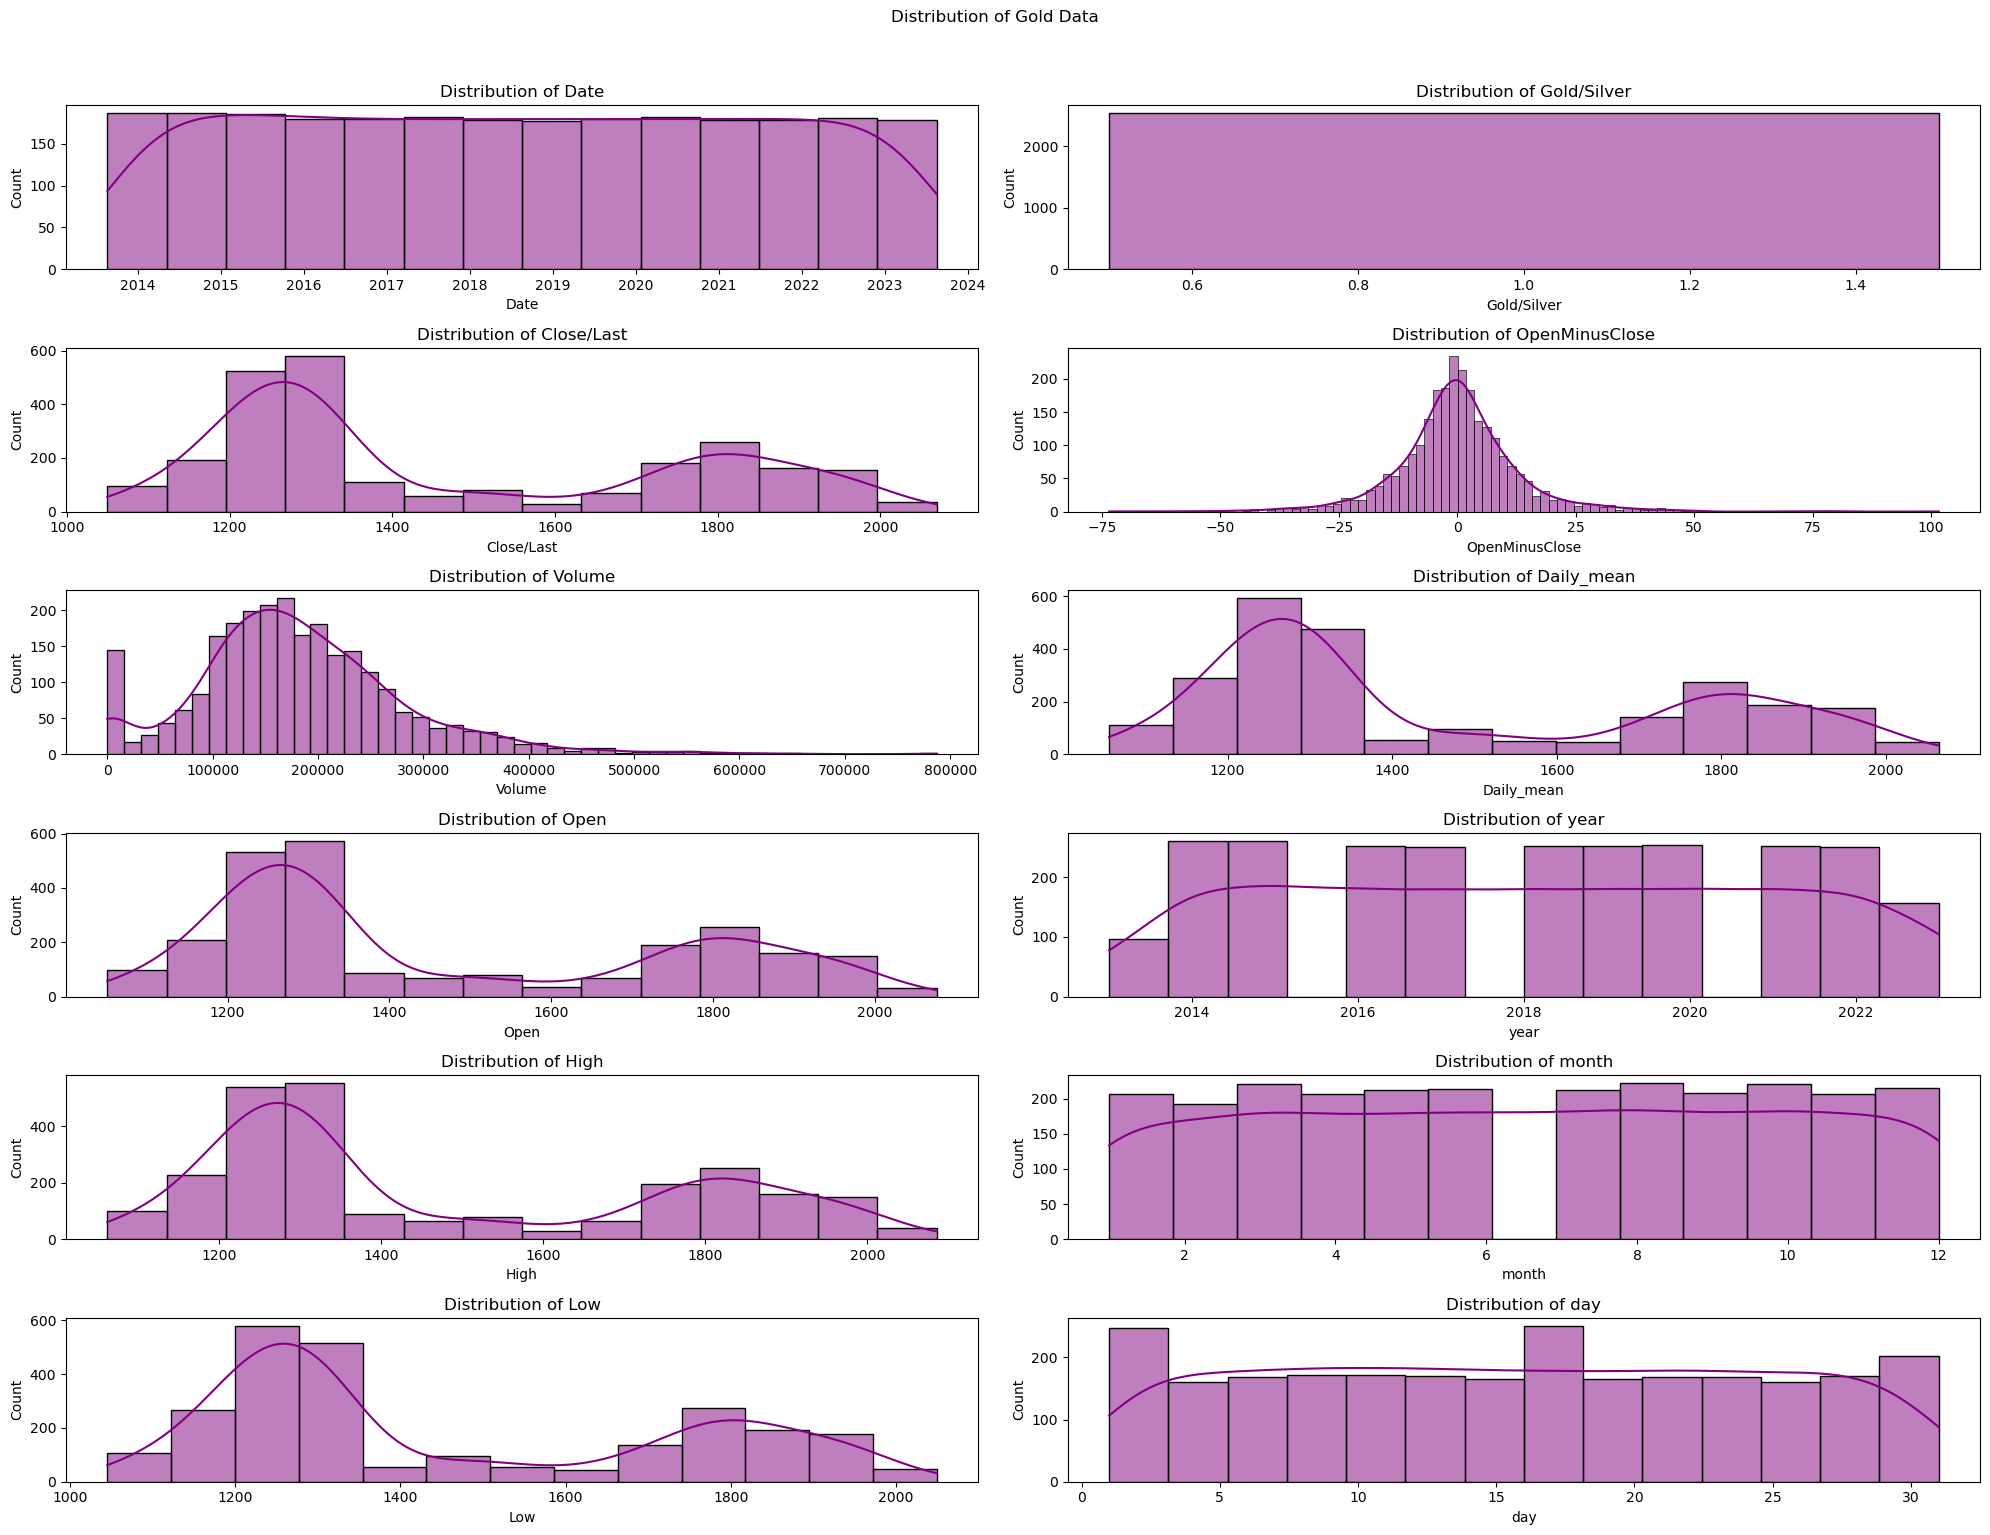

In [39]:
fig, axis = plt.subplots(6,2,figsize = (20,15))
for i, col in enumerate(numerical_vars.columns):
    if i < 6:
        j = 0    
        sns.histplot(x = all_data[all_data['Gold/Silver']==1][col], kde = True, ax = axis[i,j], color = 'purple')
        axis[i,j].set_title("Distribution of " + col)
    else:
        i = i - 6
        j = 1
        sns.histplot(x = all_data[all_data['Gold/Silver']==1][col],kde = True, ax = axis[i,j], color = 'purple')
        axis[i,j].set_title("Distribution of " + col)
plt.suptitle('Distribution of Gold Data', y=1.02)
plt.tight_layout()

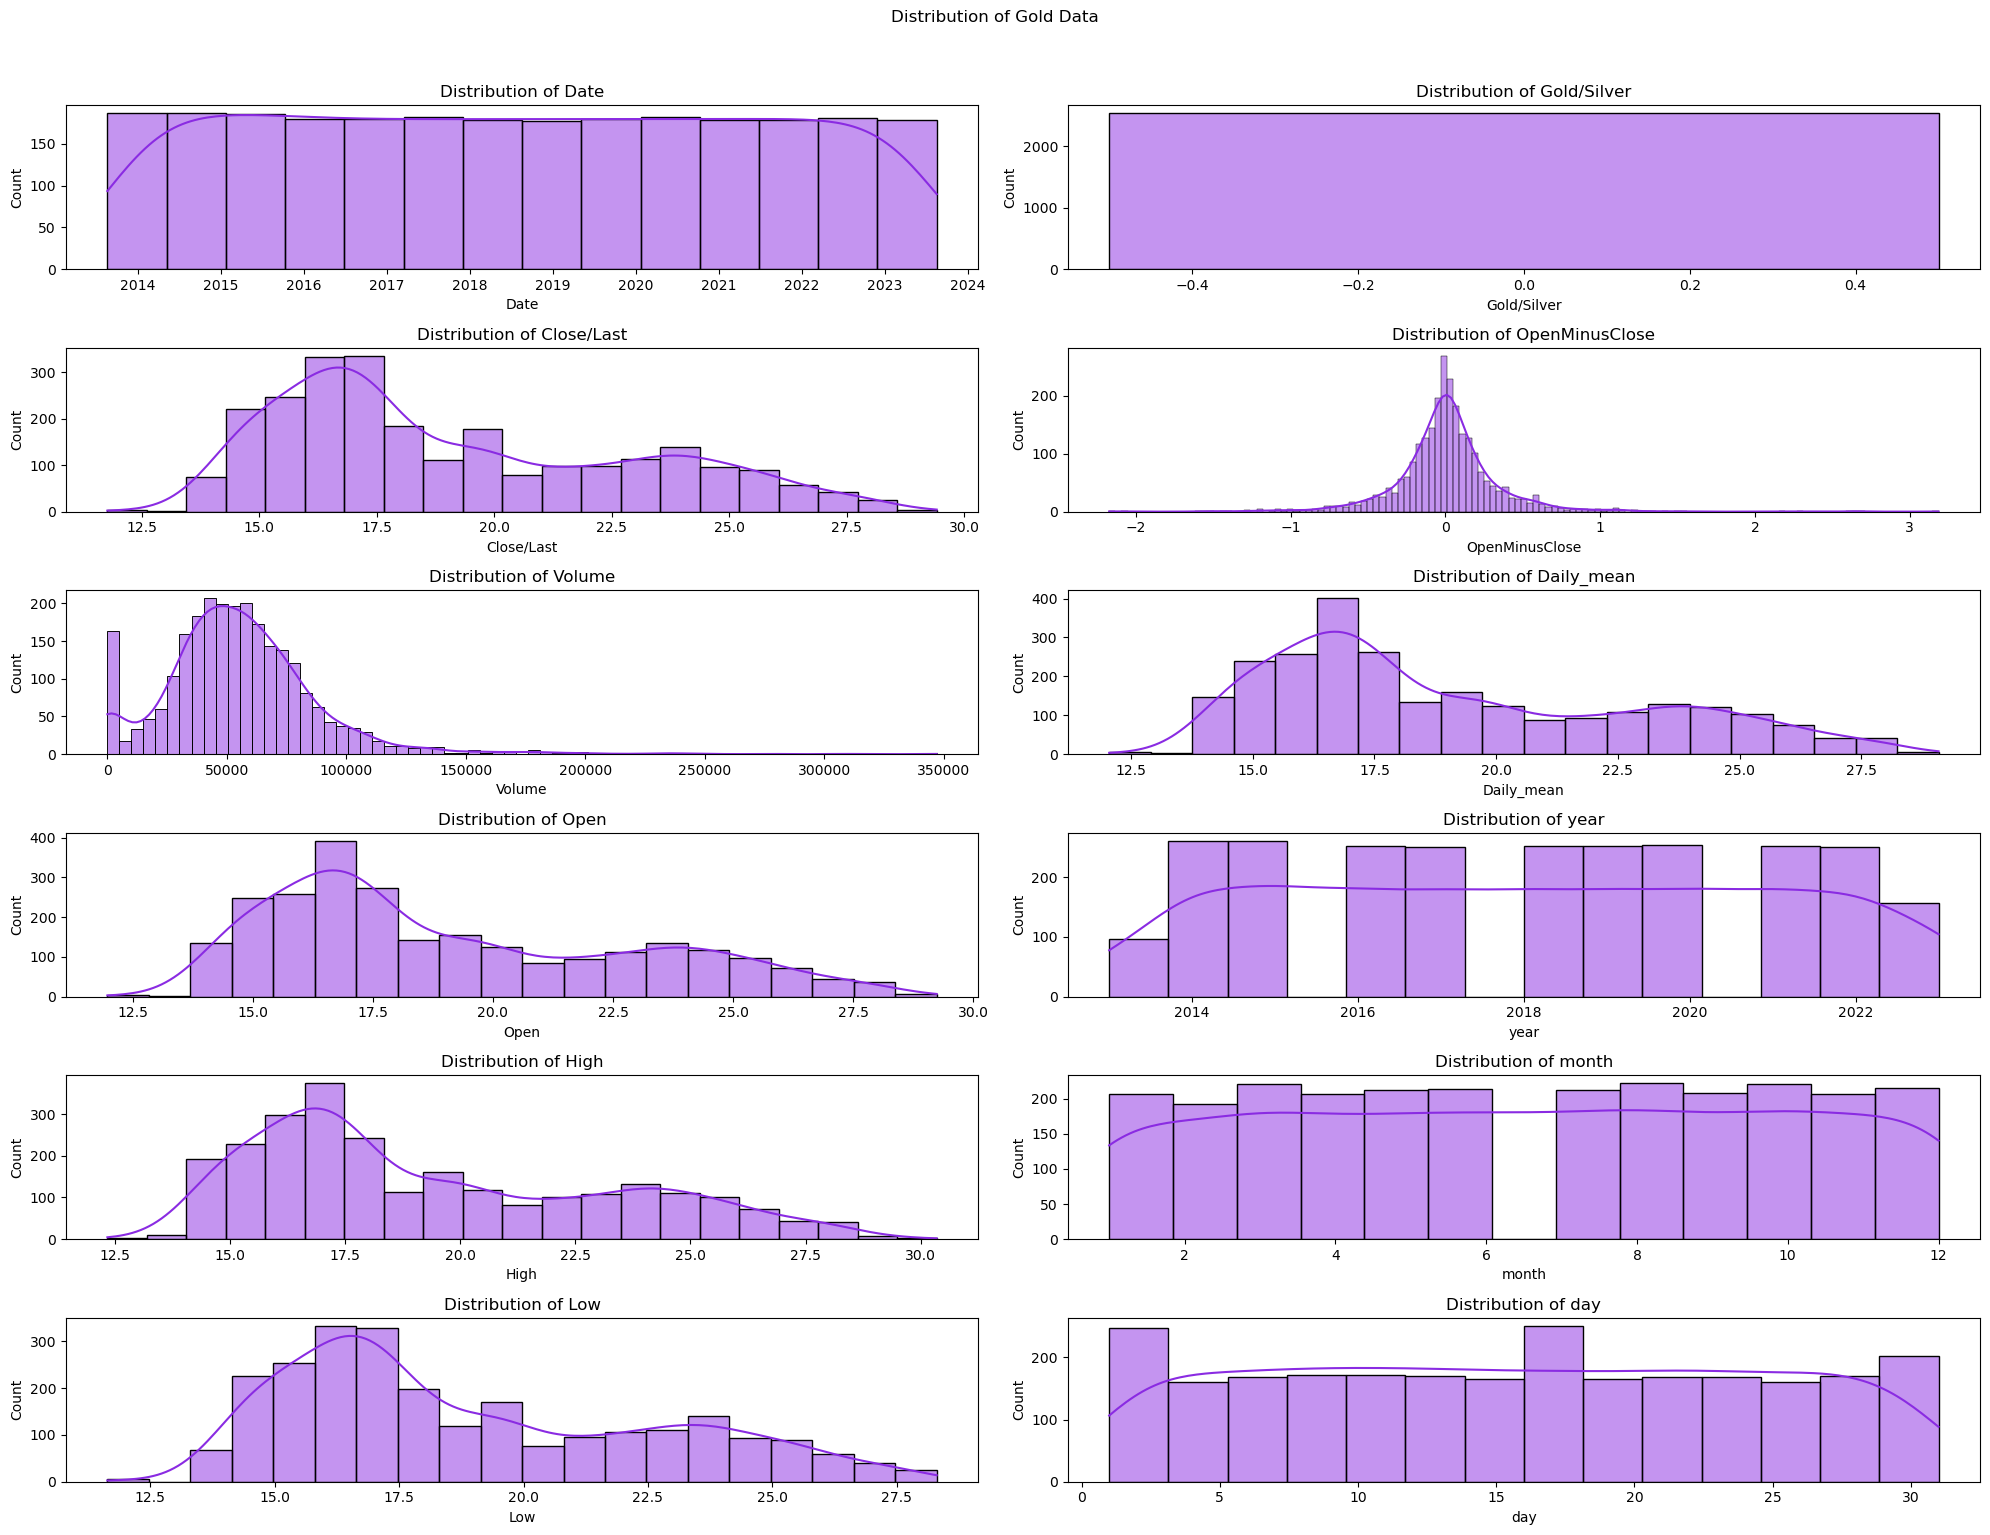

In [40]:
fig, axis = plt.subplots(6,2,figsize = (20,15))
for i, col in enumerate(numerical_vars.columns):
    if i < 6:
        j = 0    
        sns.histplot(x = all_data[all_data['Gold/Silver']==0][col], kde = True, ax = axis[i,j], color = 'blueviolet')
        axis[i,j].set_title("Distribution of " + col)
    else:
        i = i - 6
        j = 1
        sns.histplot(x = all_data[all_data['Gold/Silver']==0][col],kde = True, ax = axis[i,j], color = 'blueviolet')
        axis[i,j].set_title("Distribution of " + col)
plt.suptitle('Distribution of Gold Data', y=1.02)
plt.tight_layout()

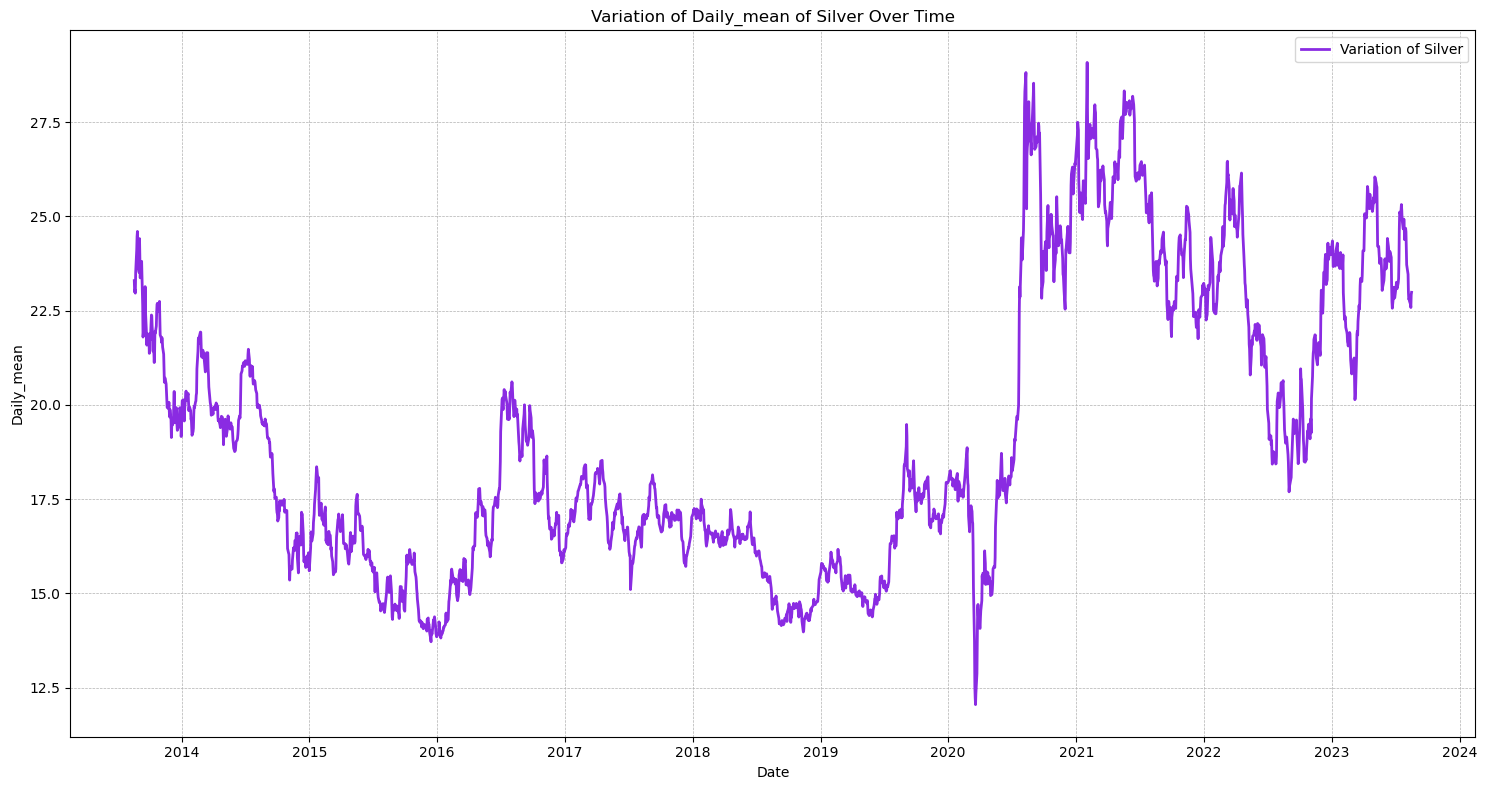

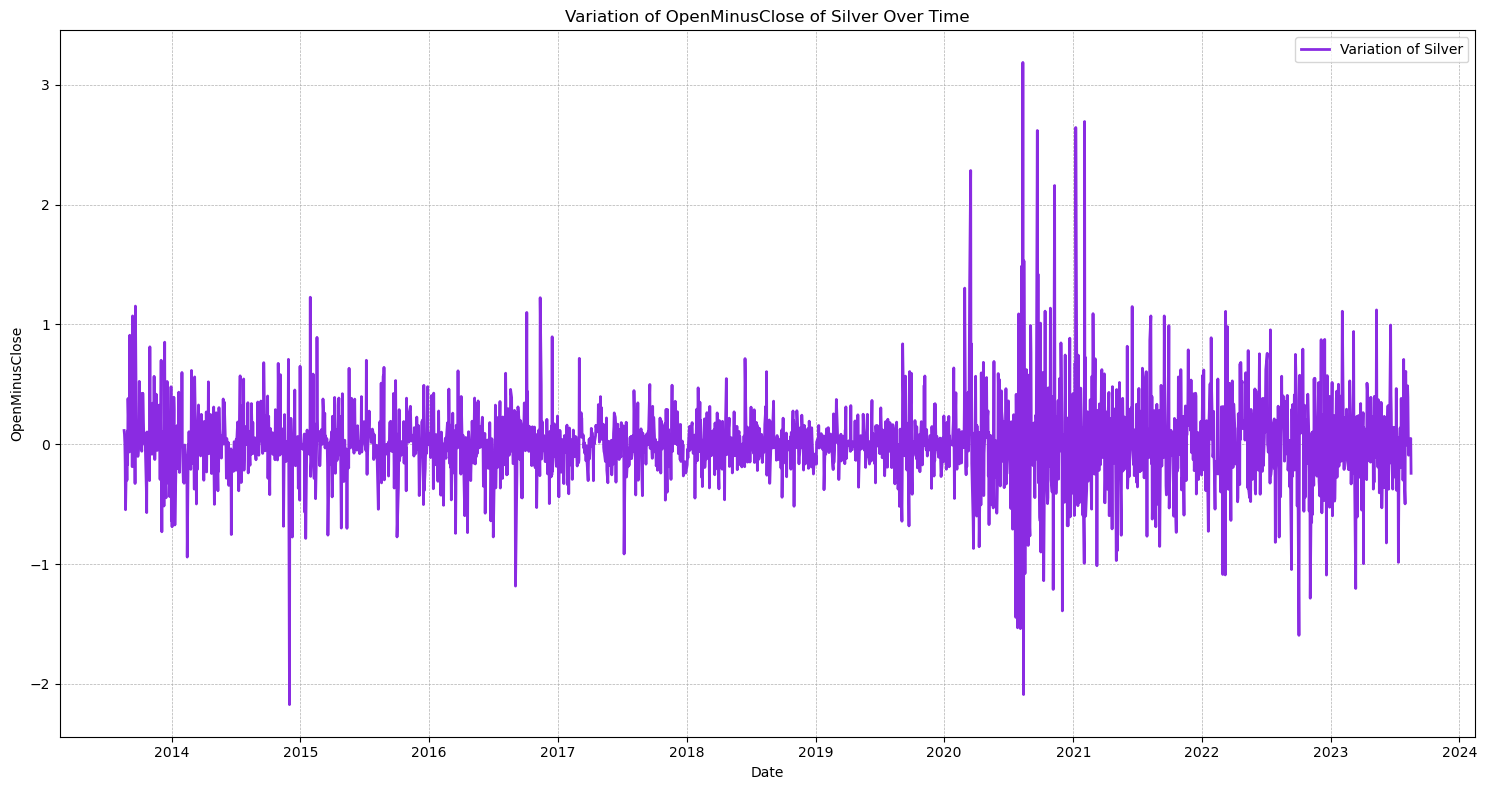

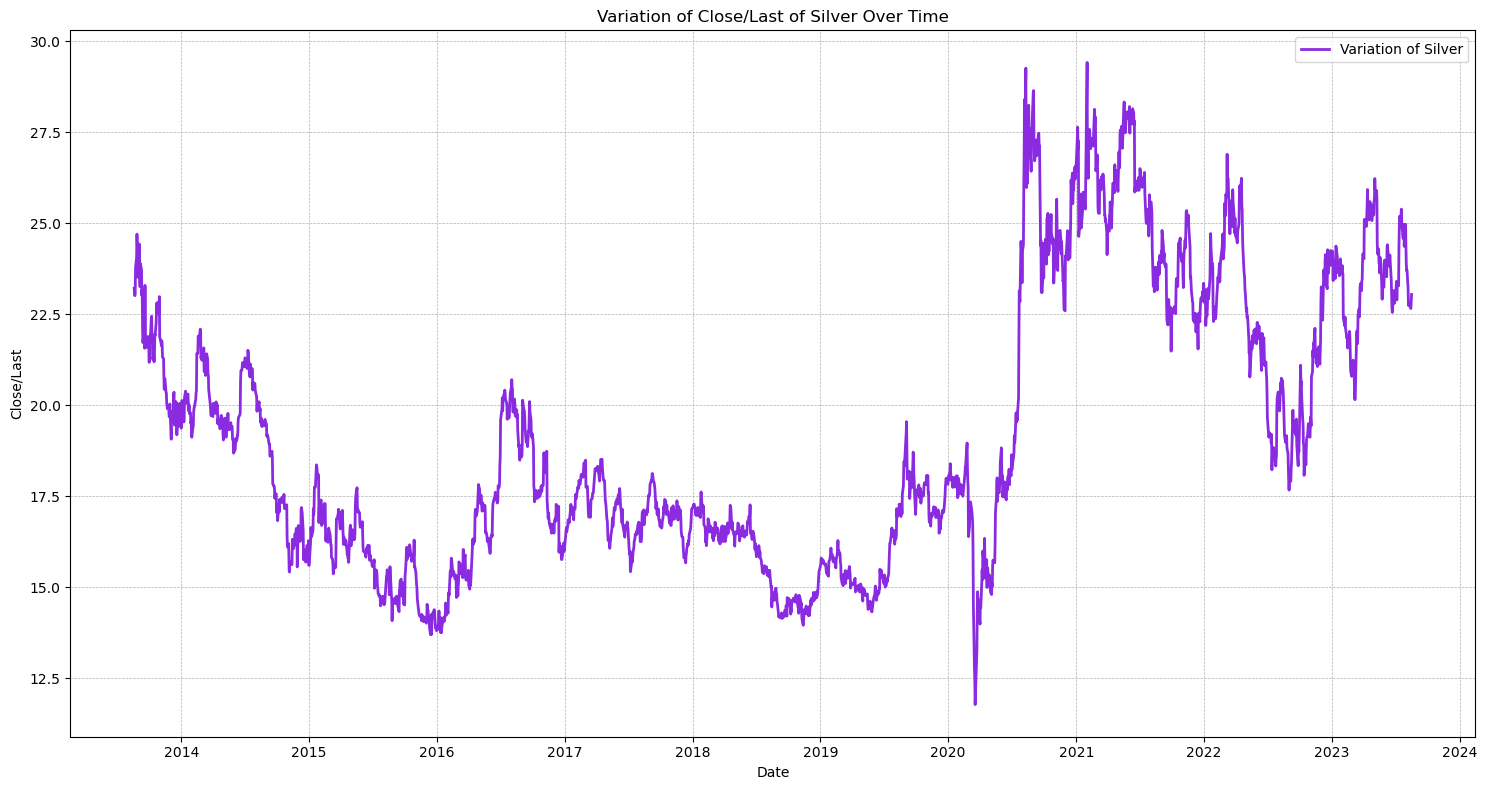

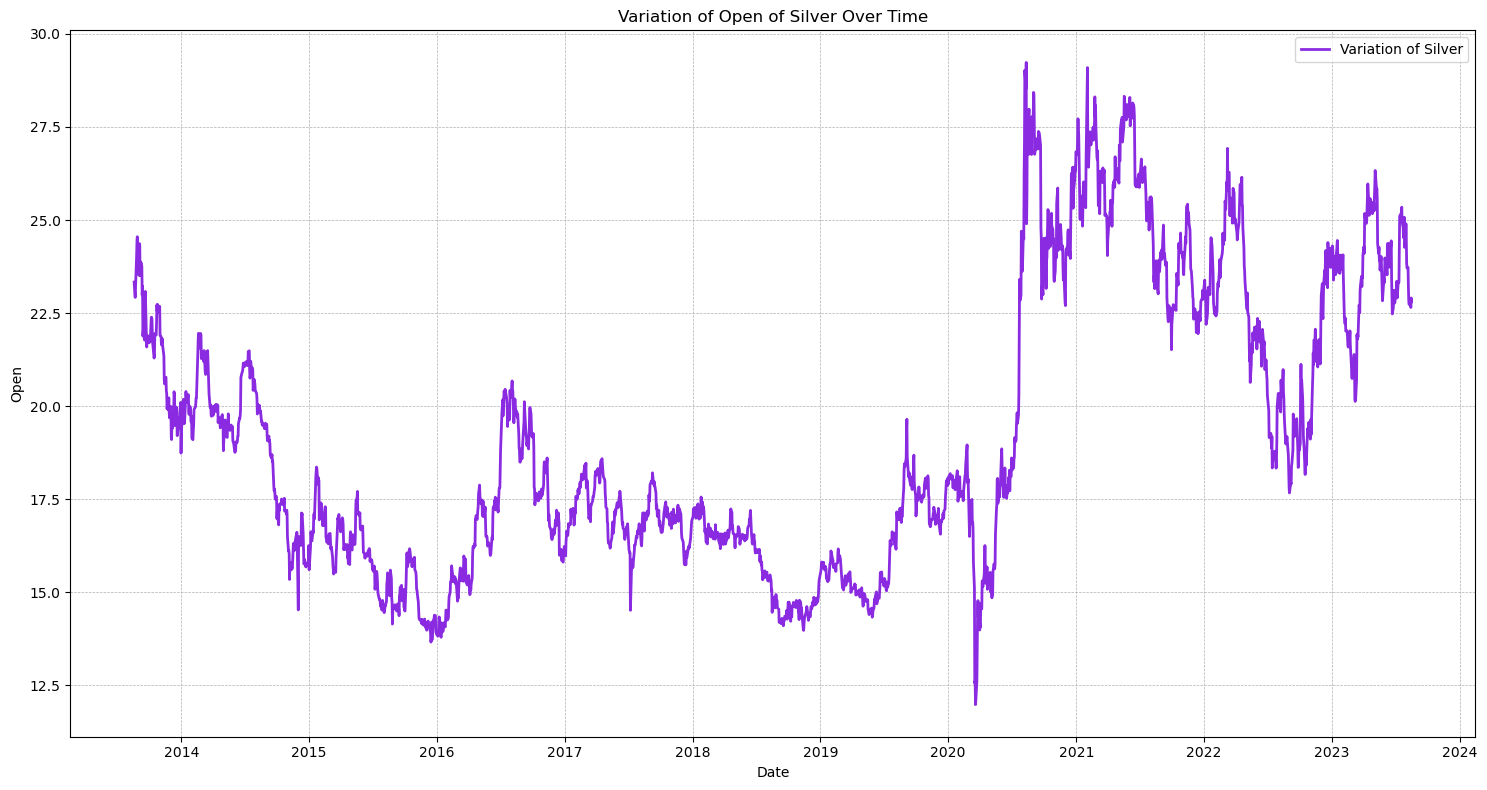

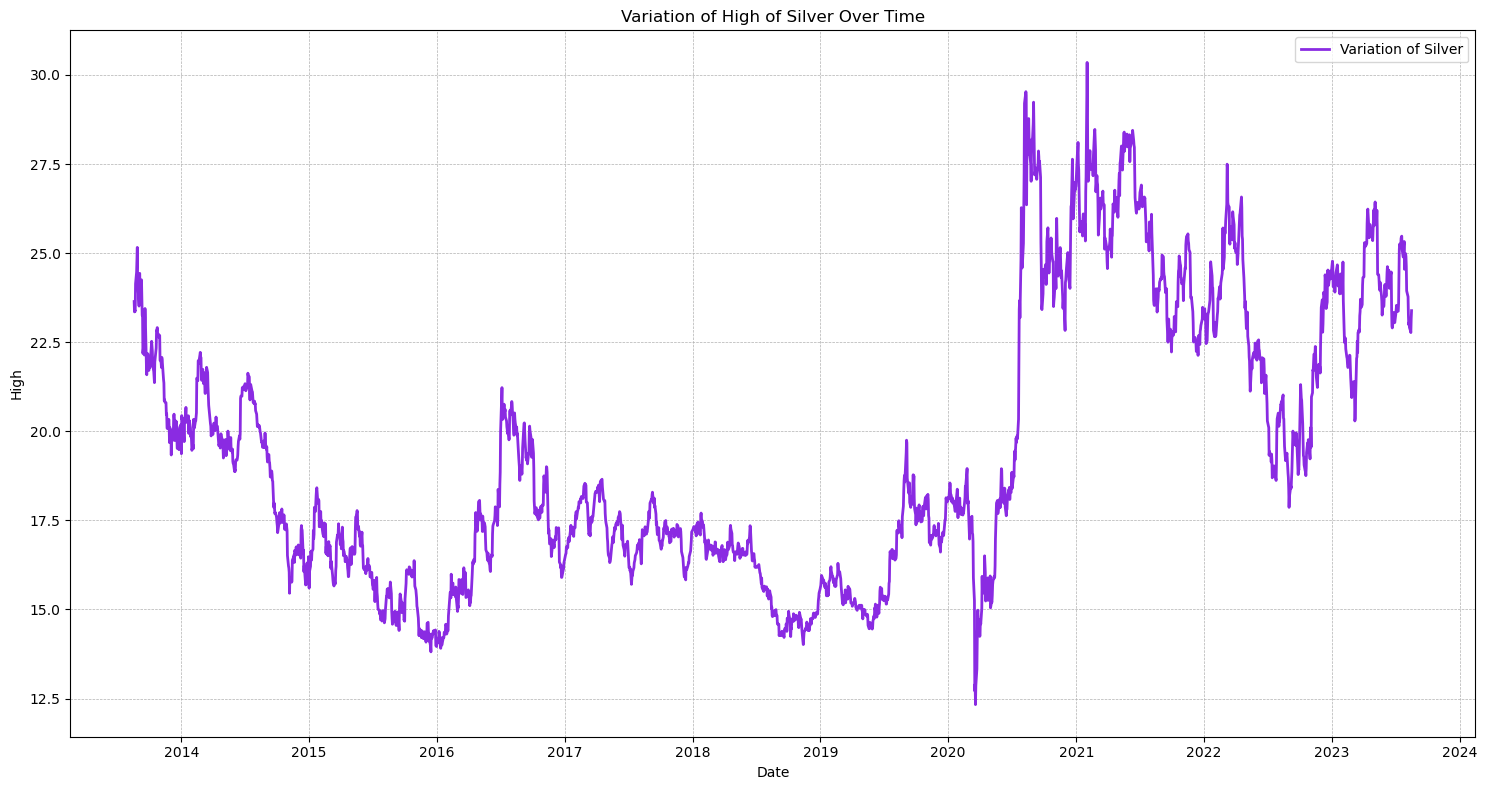

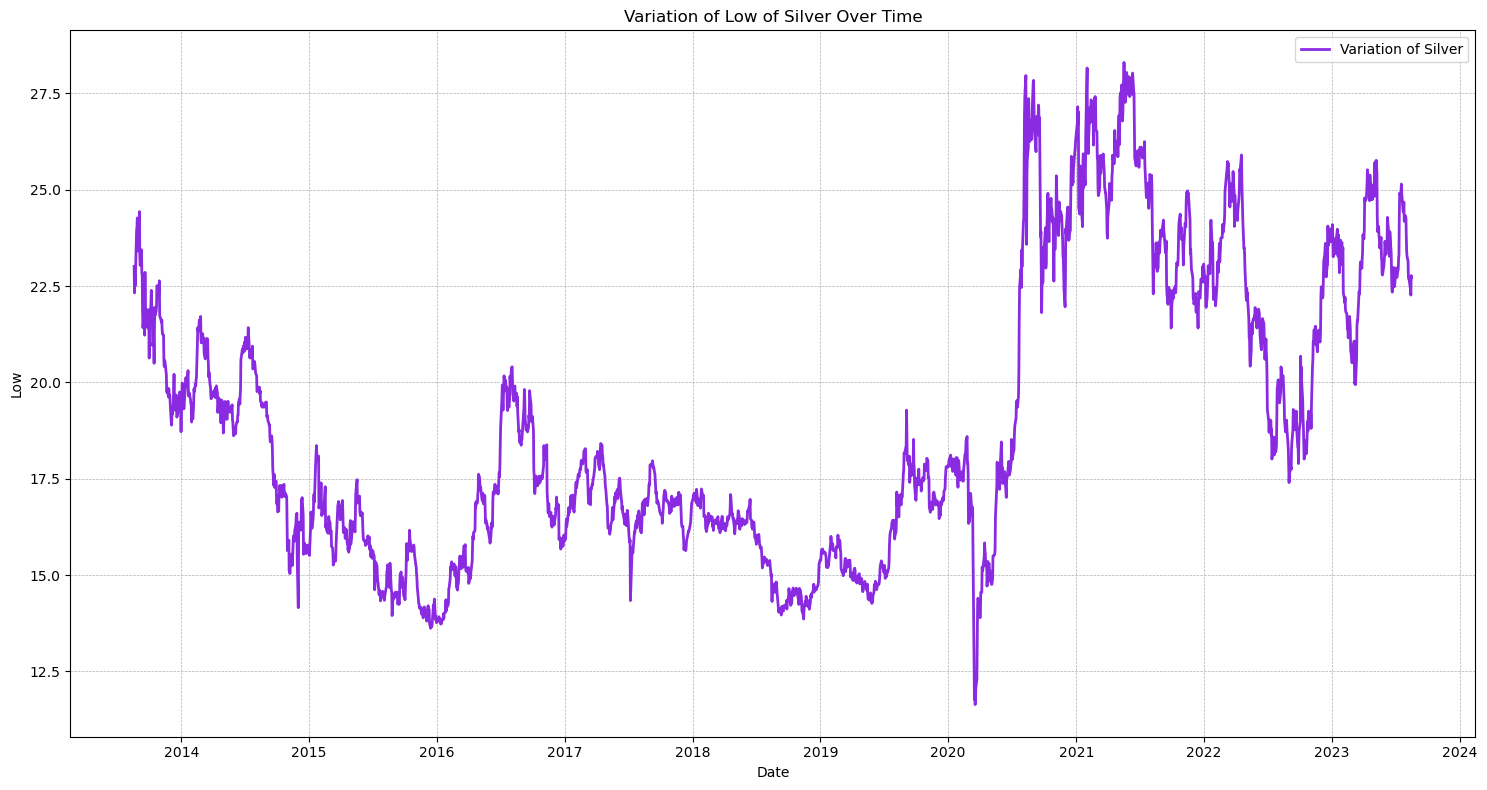

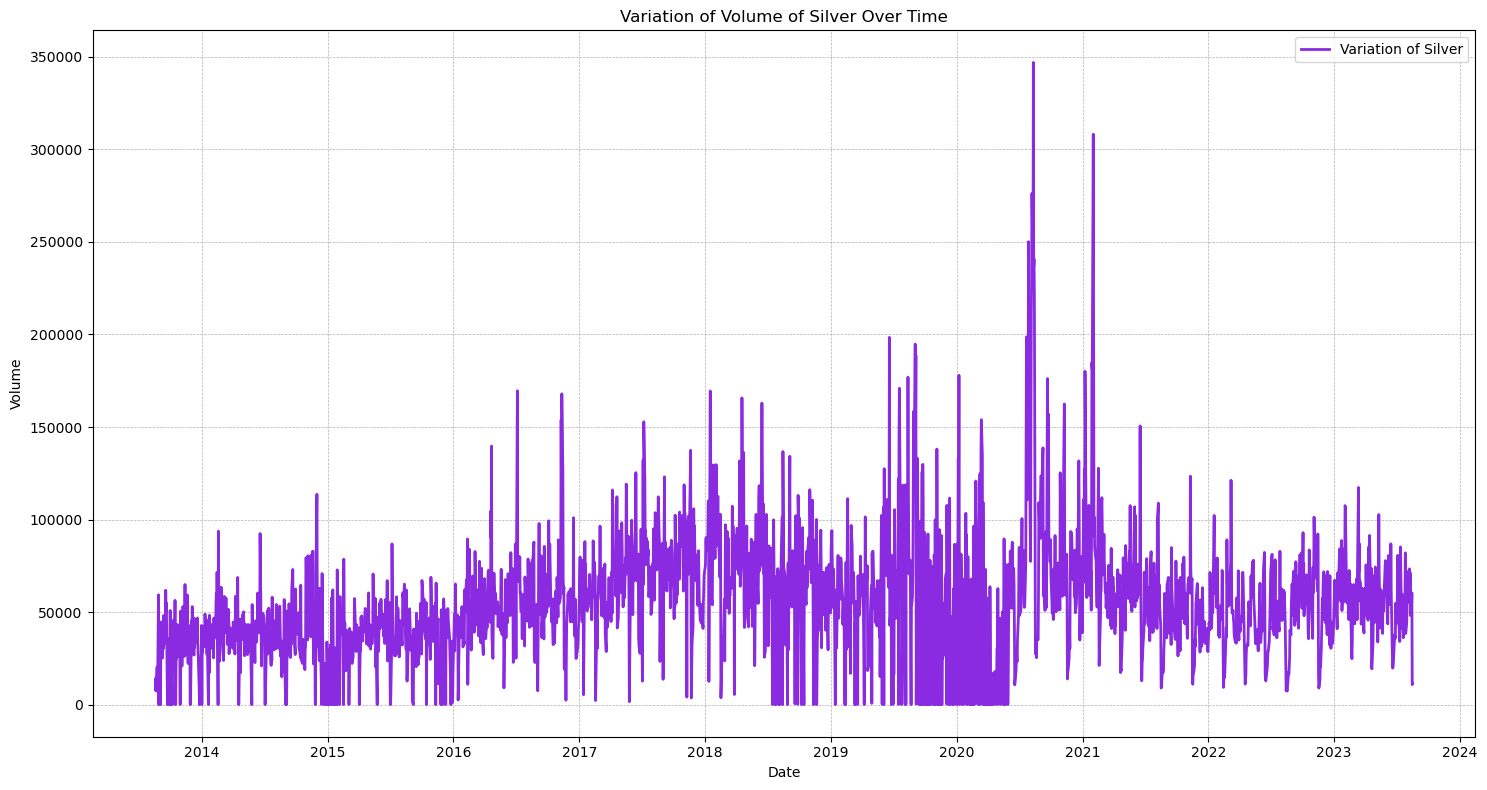

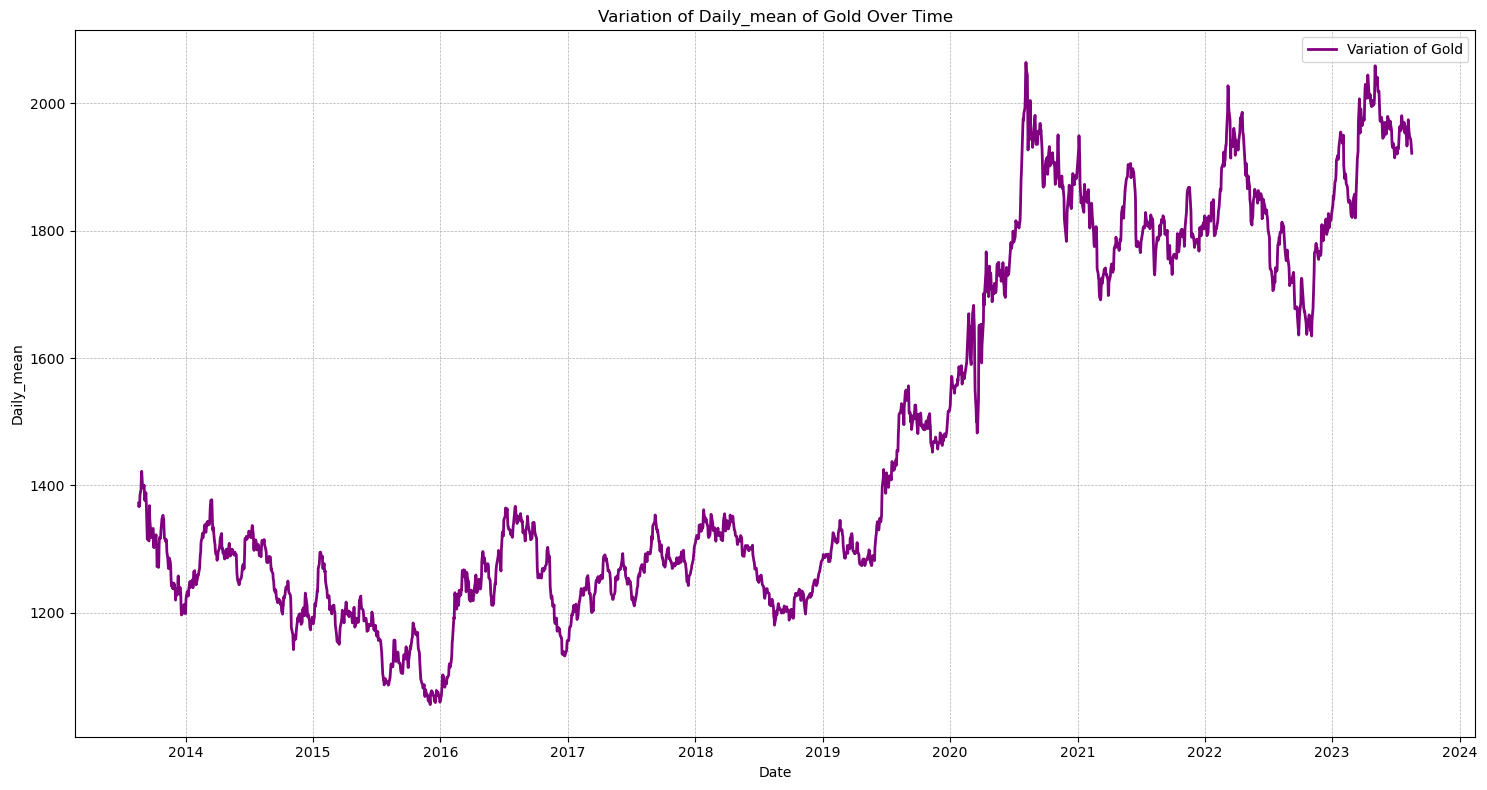

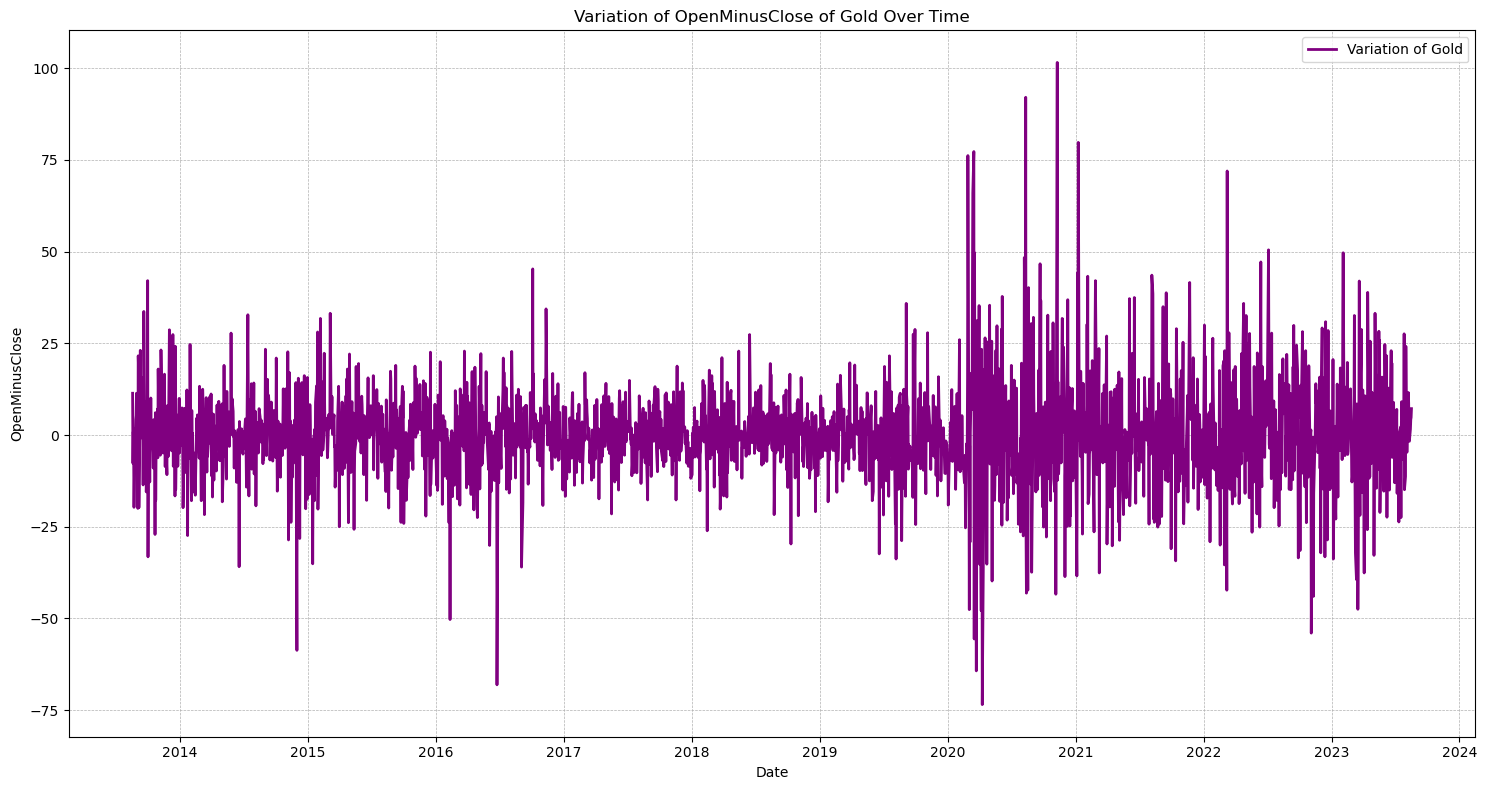

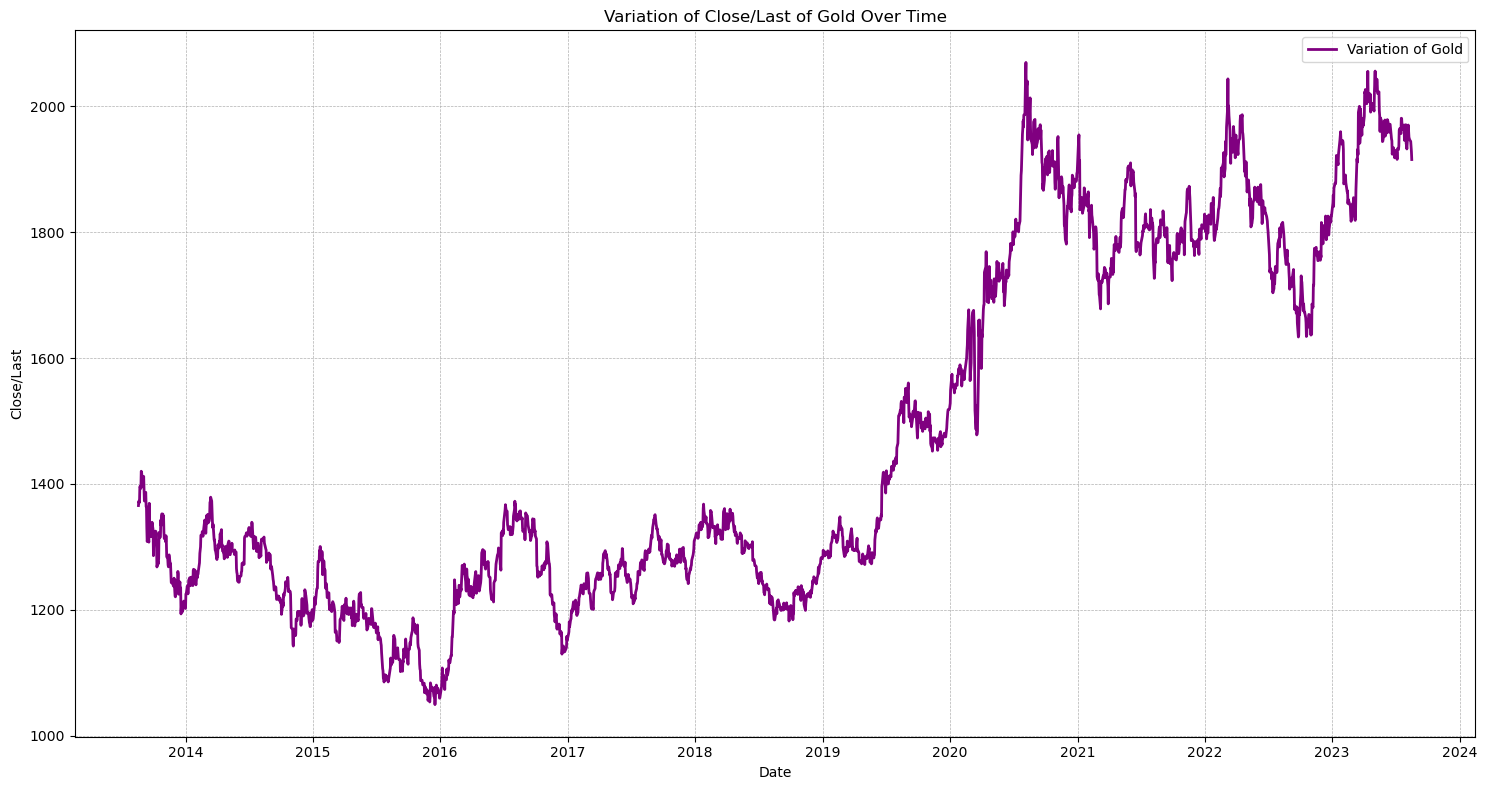

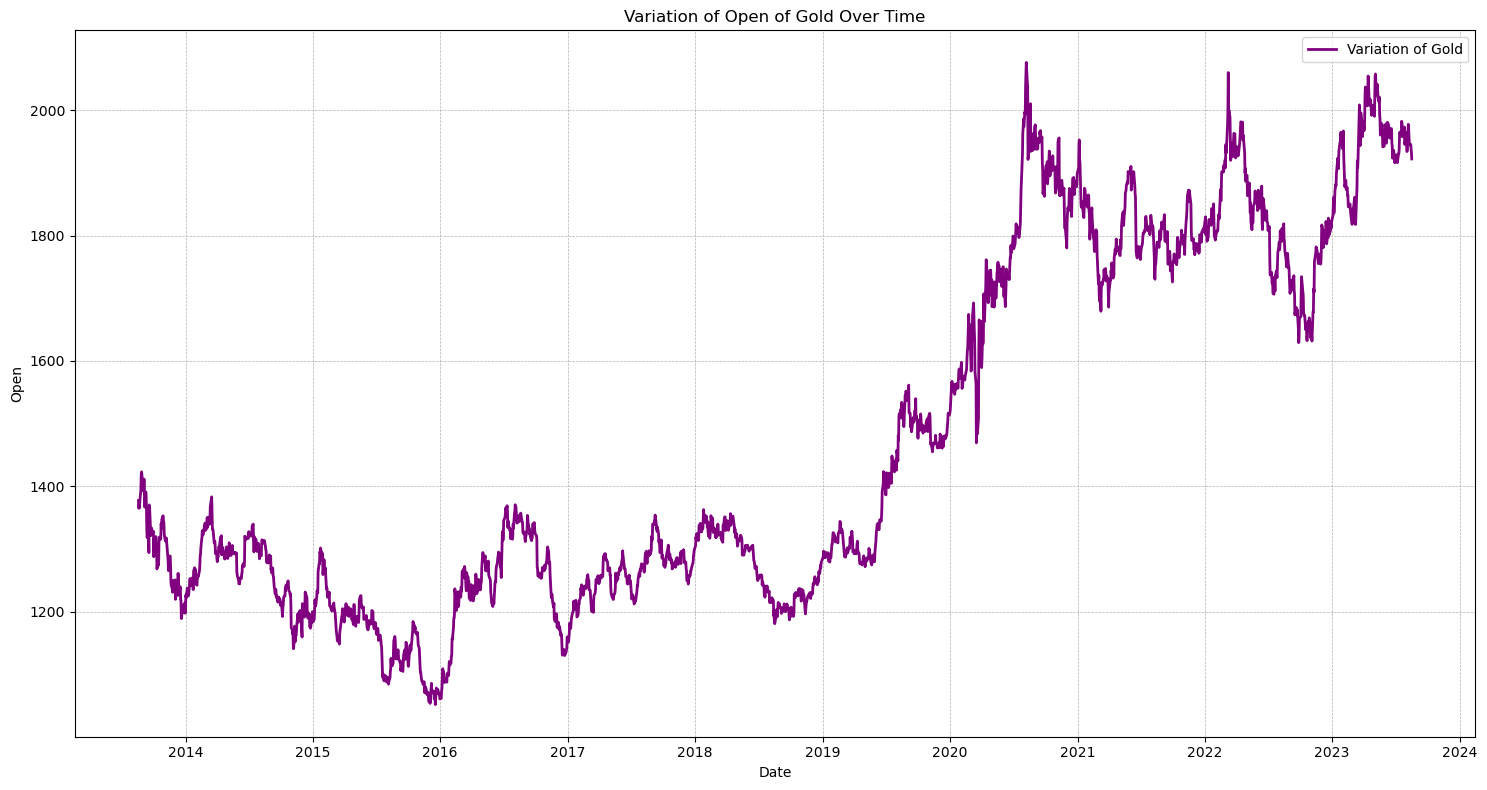

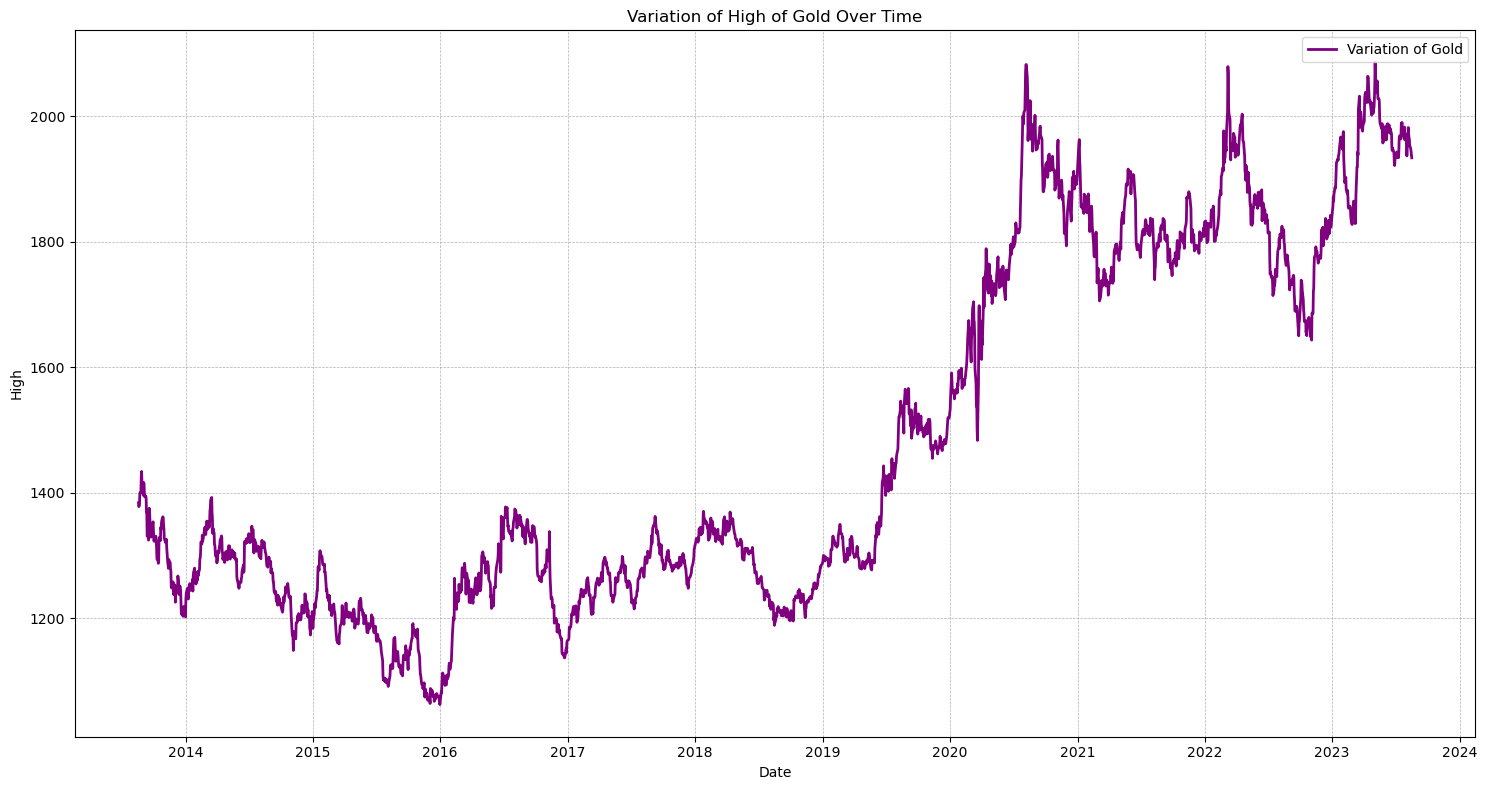

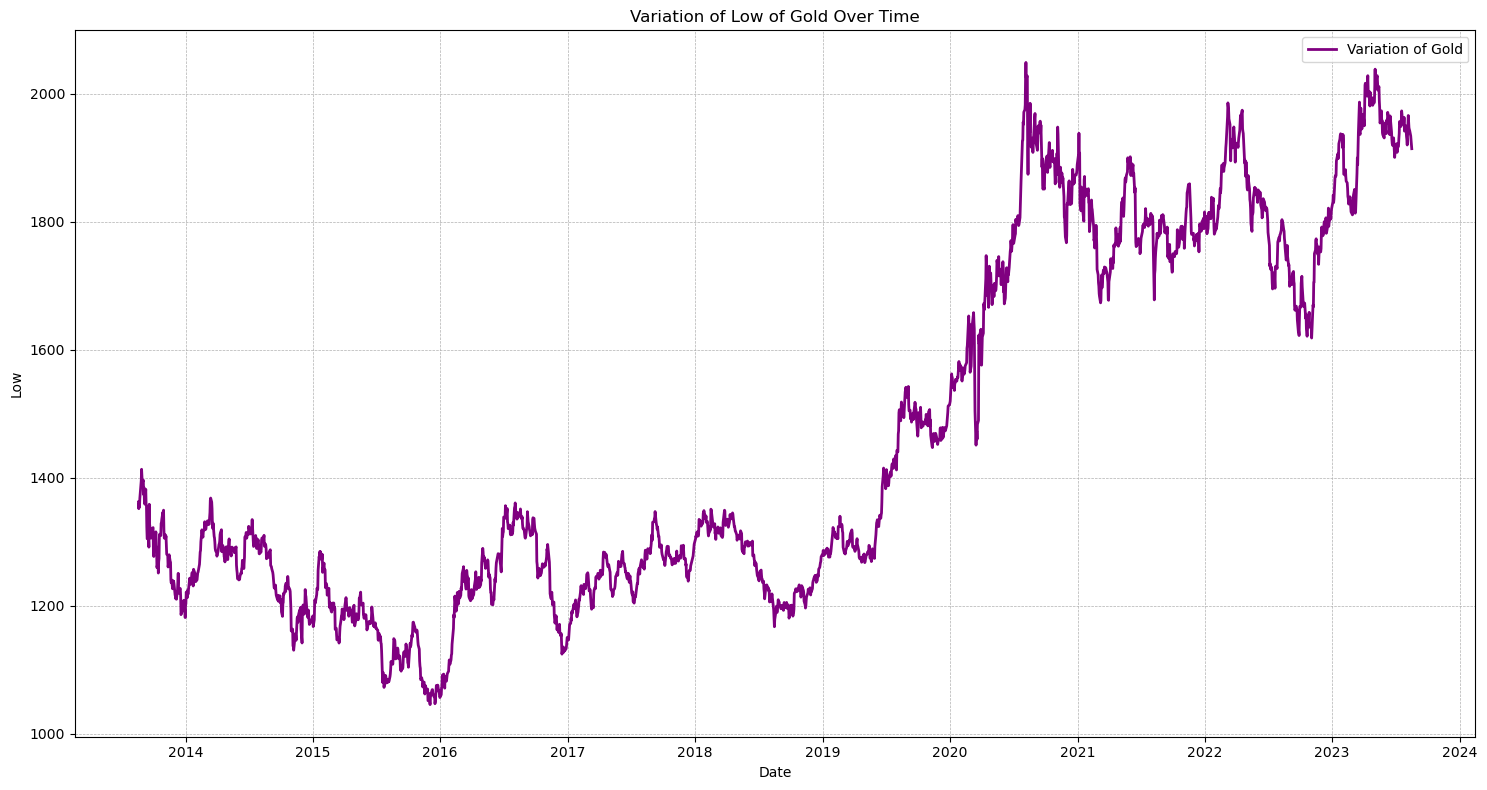

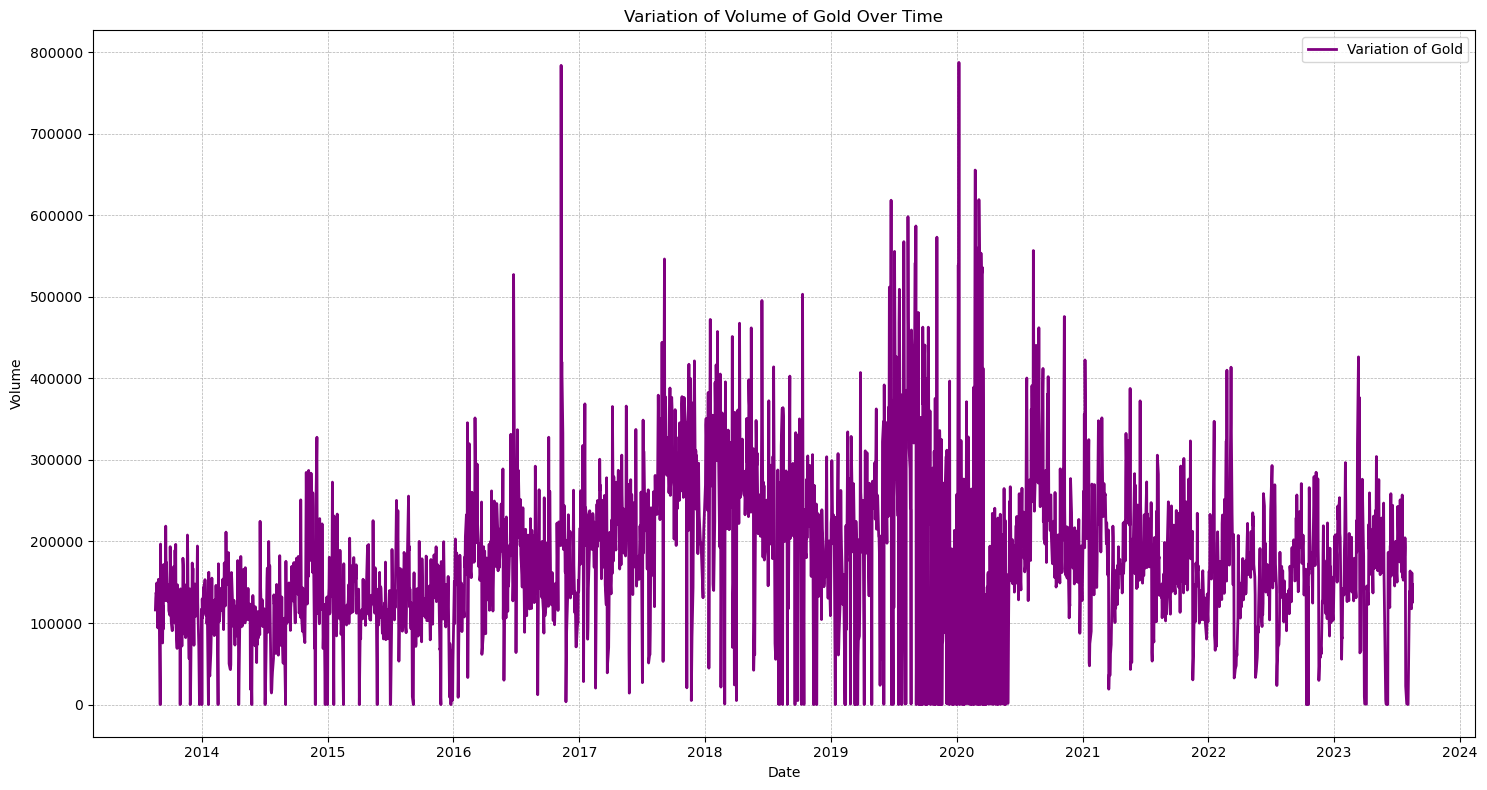

In [42]:
gold_silver = [0, 1]
names = ['Silver','Gold']
color = ['blueviolet', 'purple']

y_valor = ['Daily_mean', 'OpenMinusClose', 'Close/Last', 'Open', 'High', 'Low', 'Volume']

for material in gold_silver:
    for y_v in y_valor:
        plt.figure(figsize=(15, 8))
        plt.plot(all_data[all_data['Gold/Silver']==material]['Date'], all_data[all_data['Gold/Silver']==material][y_v], label='Variation of '+names[material],color=color[material], linewidth=2)
        plt.xlabel('Date')
        plt.ylabel(y_v)
        plt.title('Variation of '+y_v+' of '+names[material]+' Over Time')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()

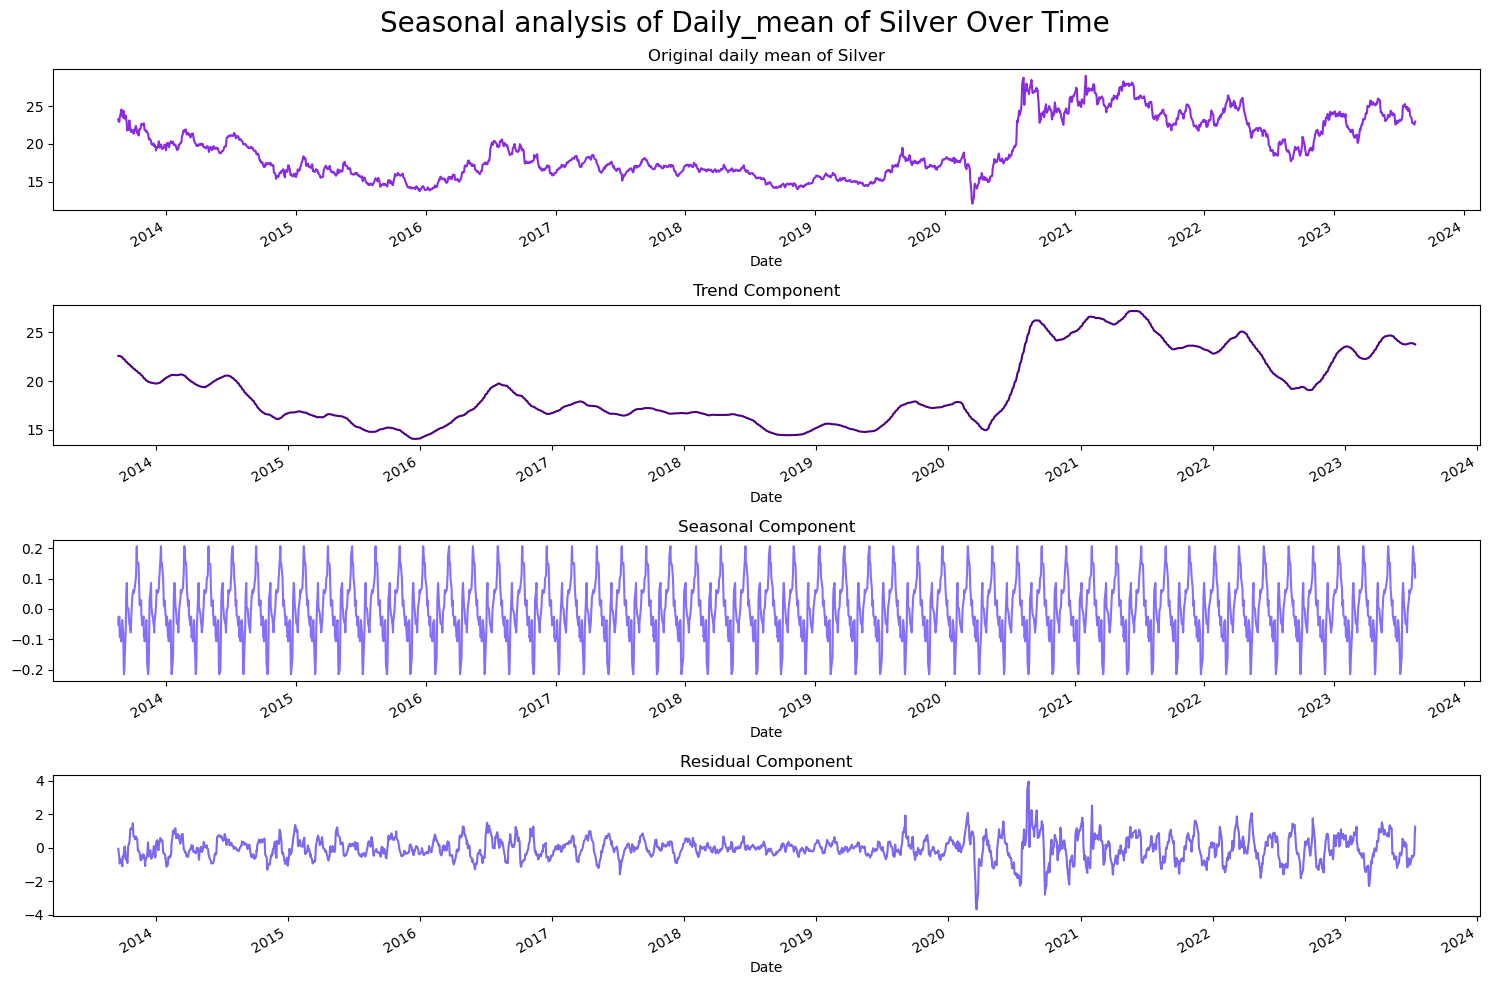

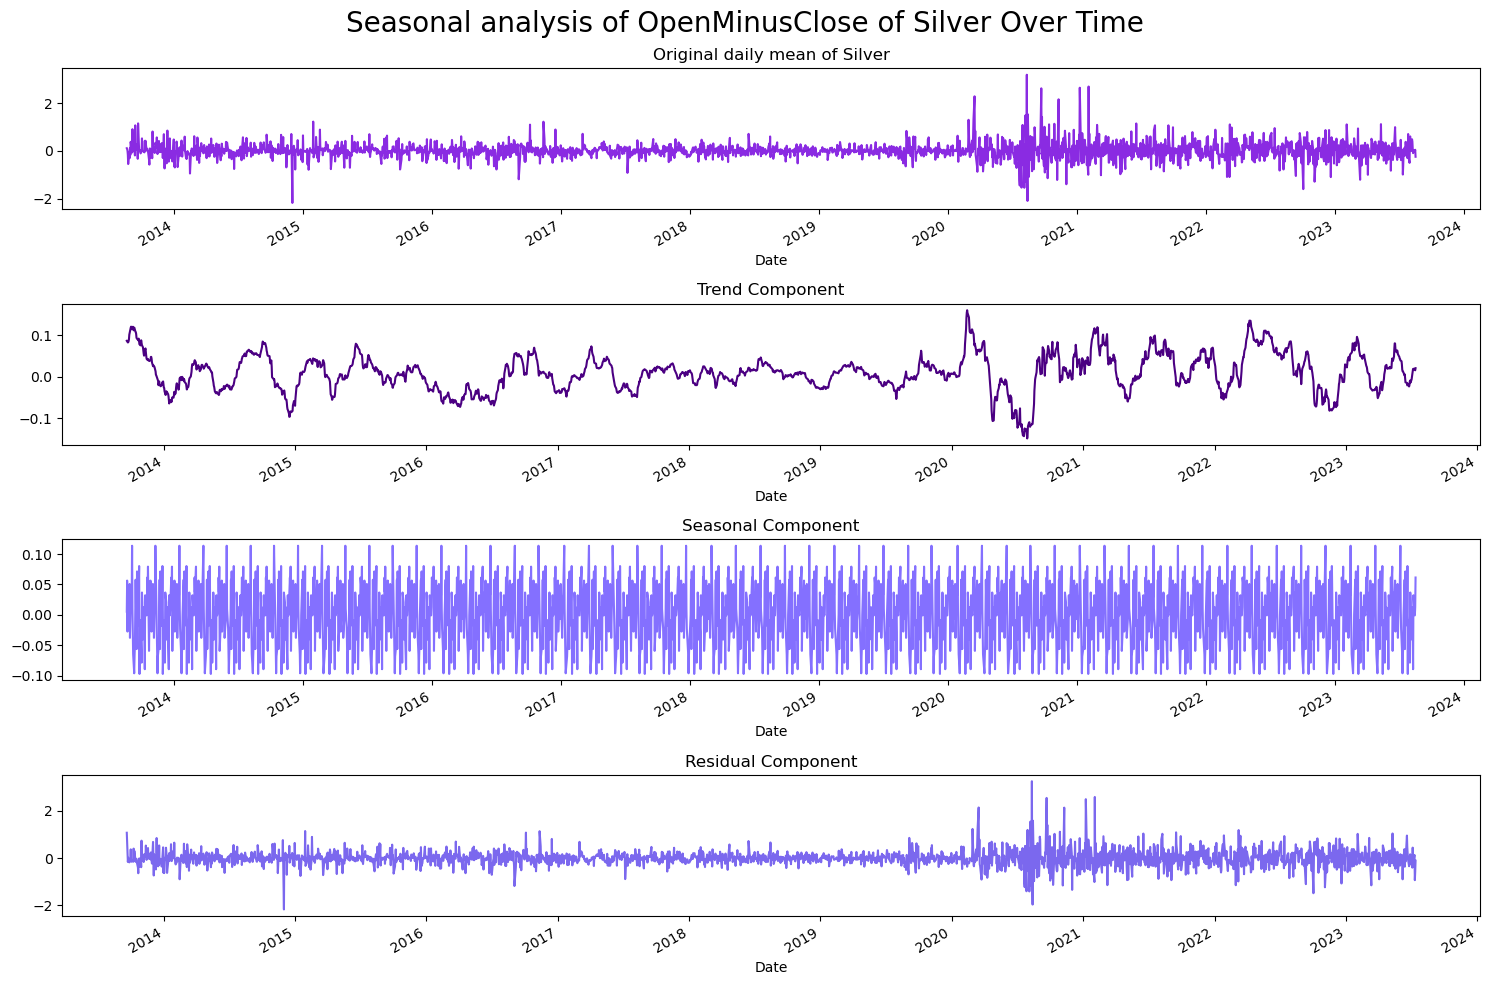

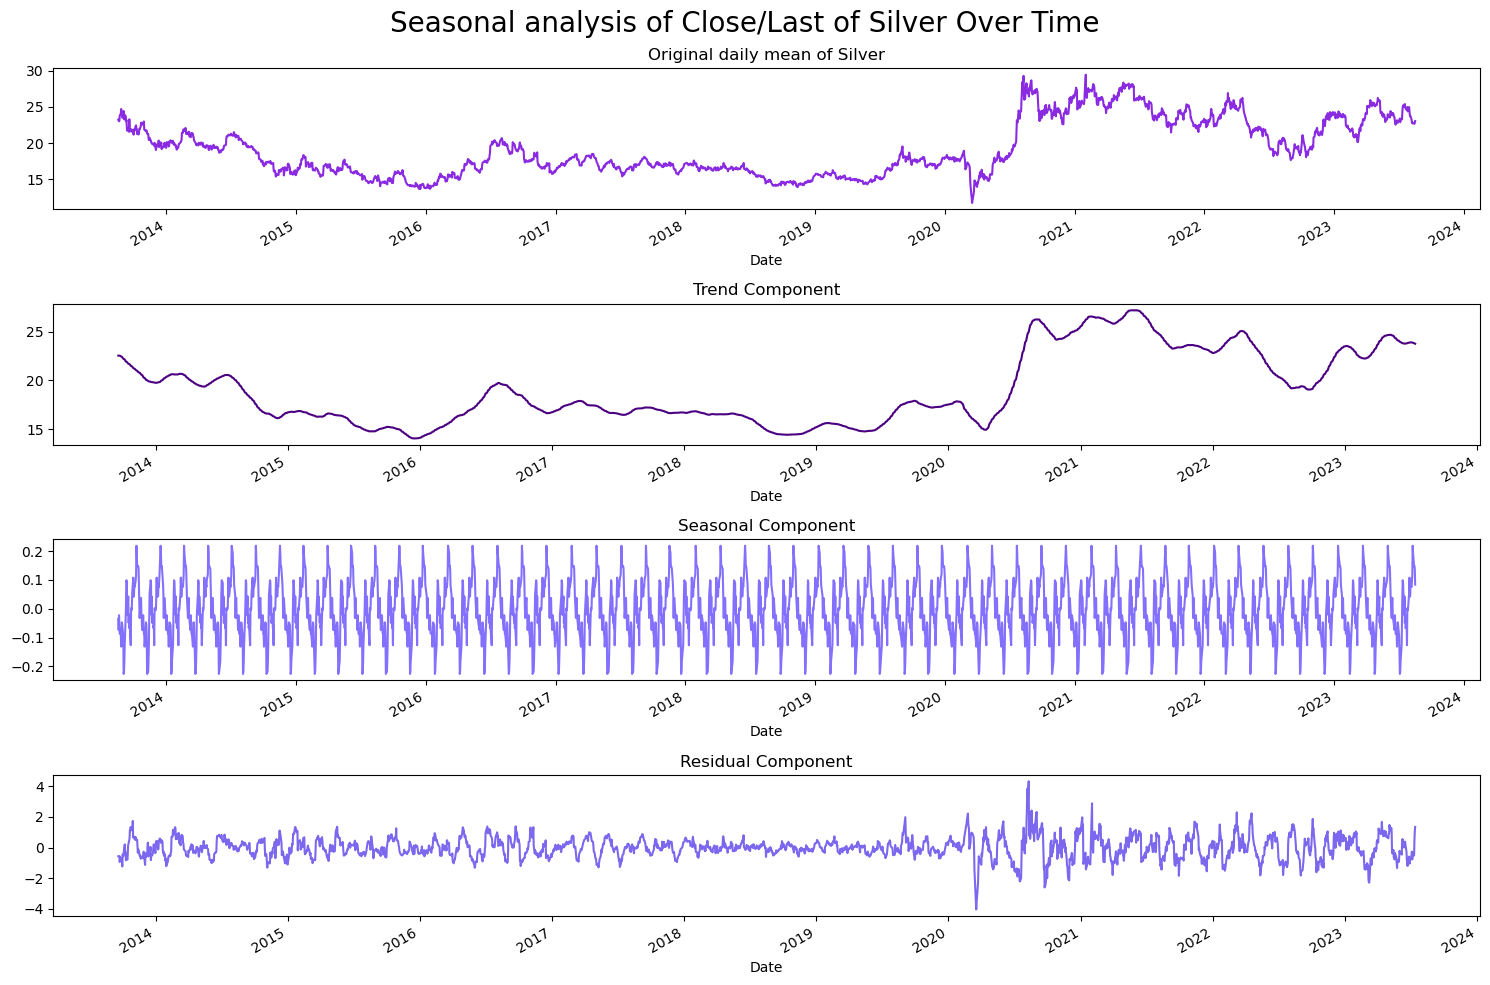

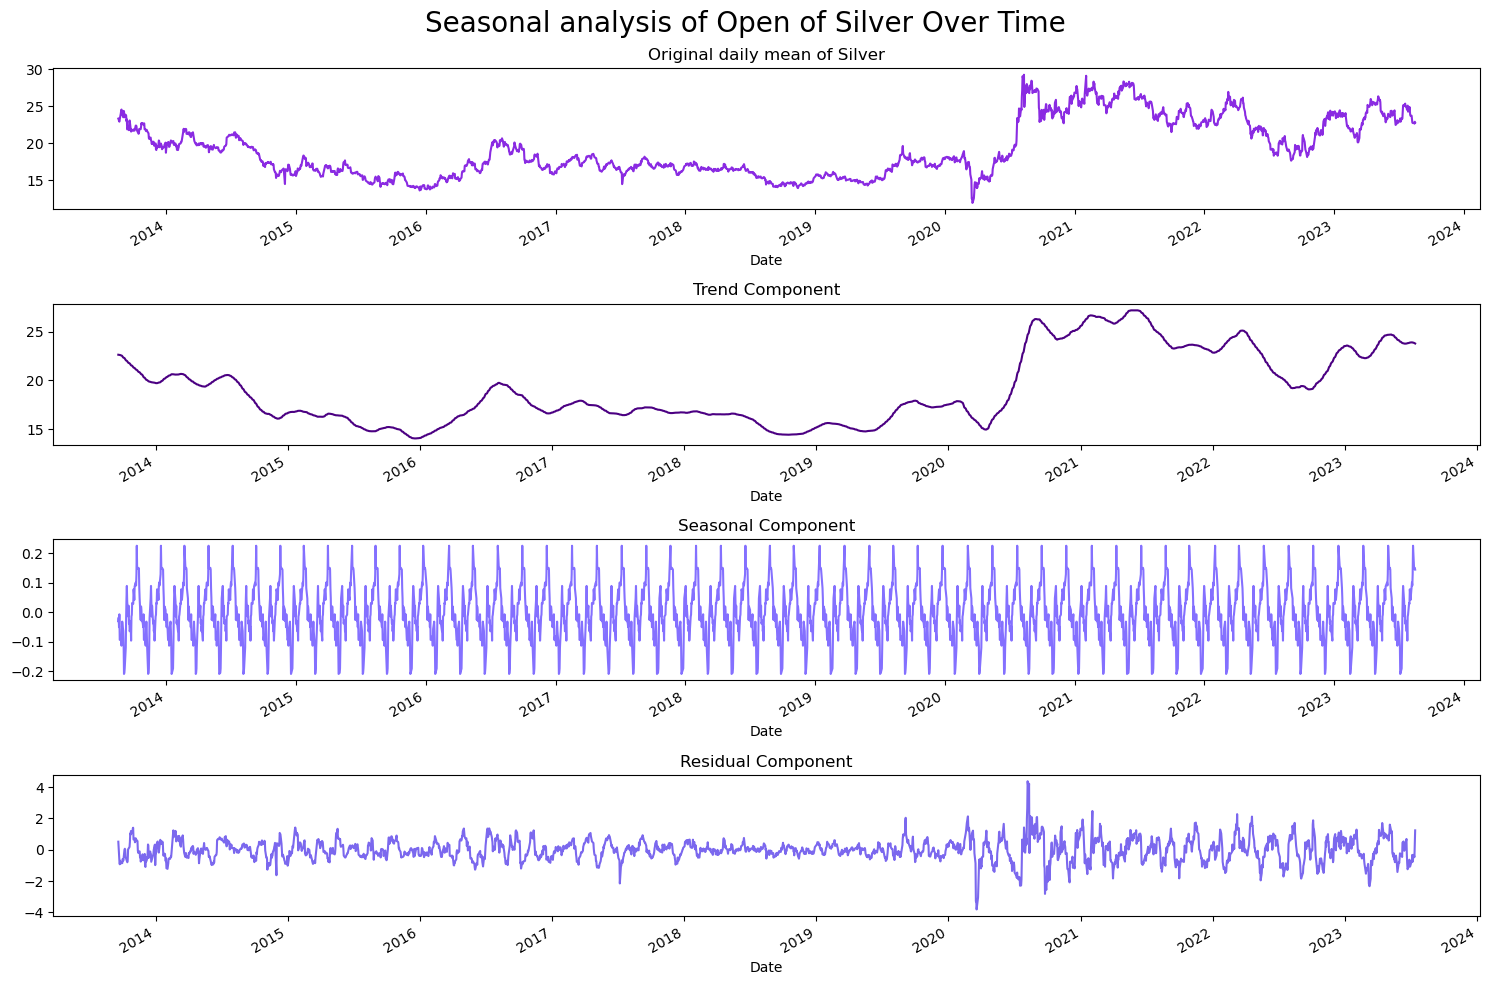

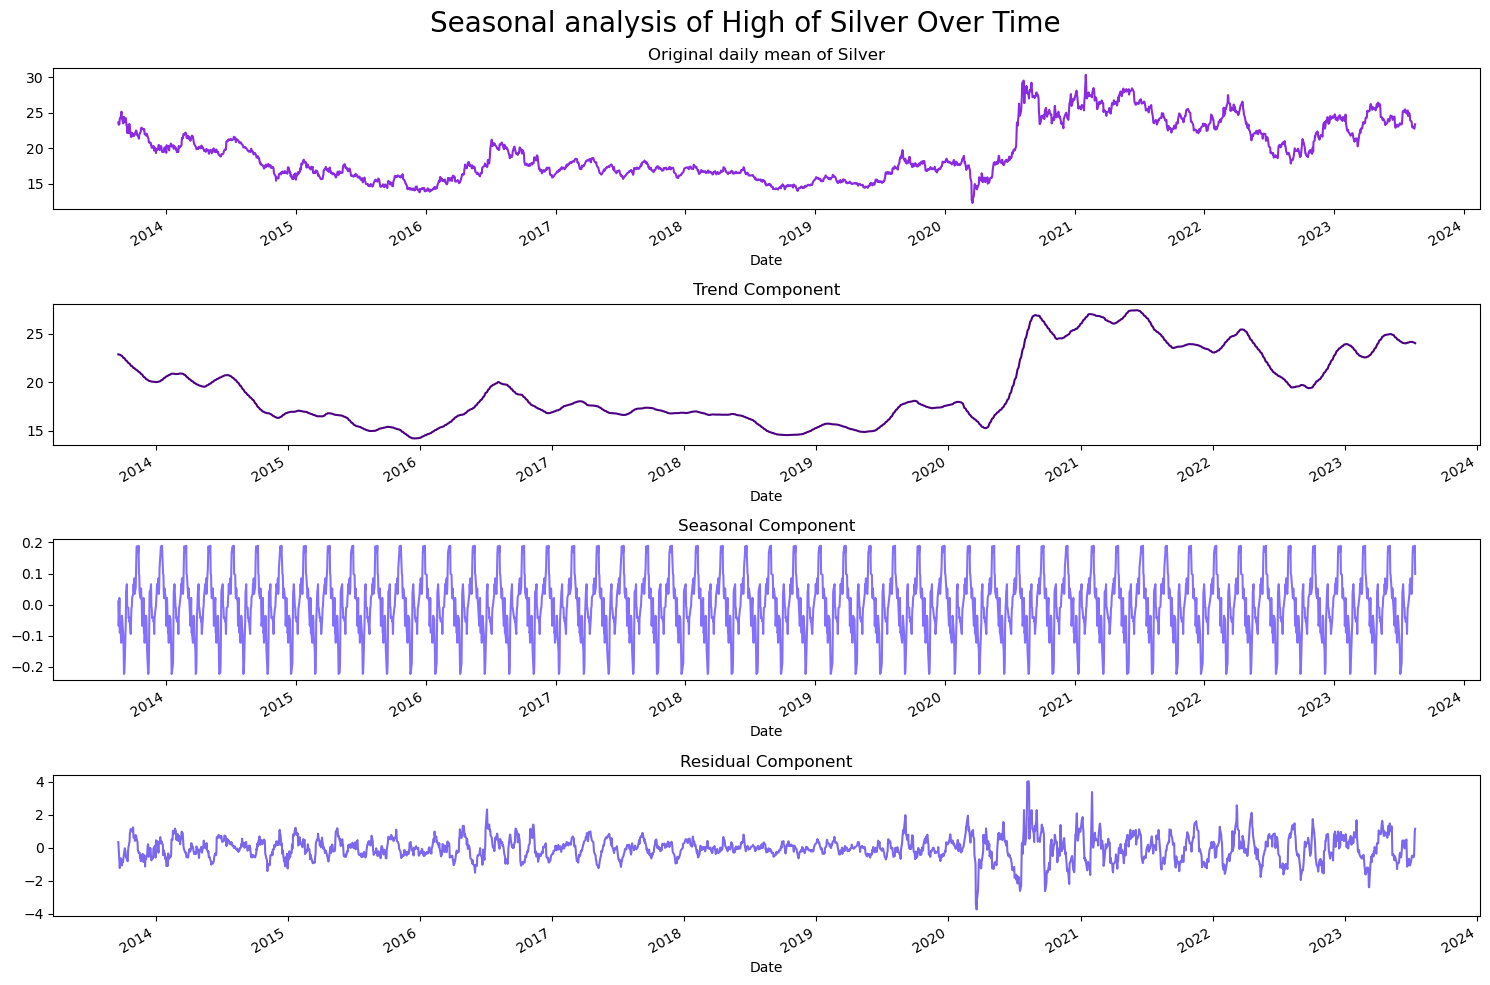

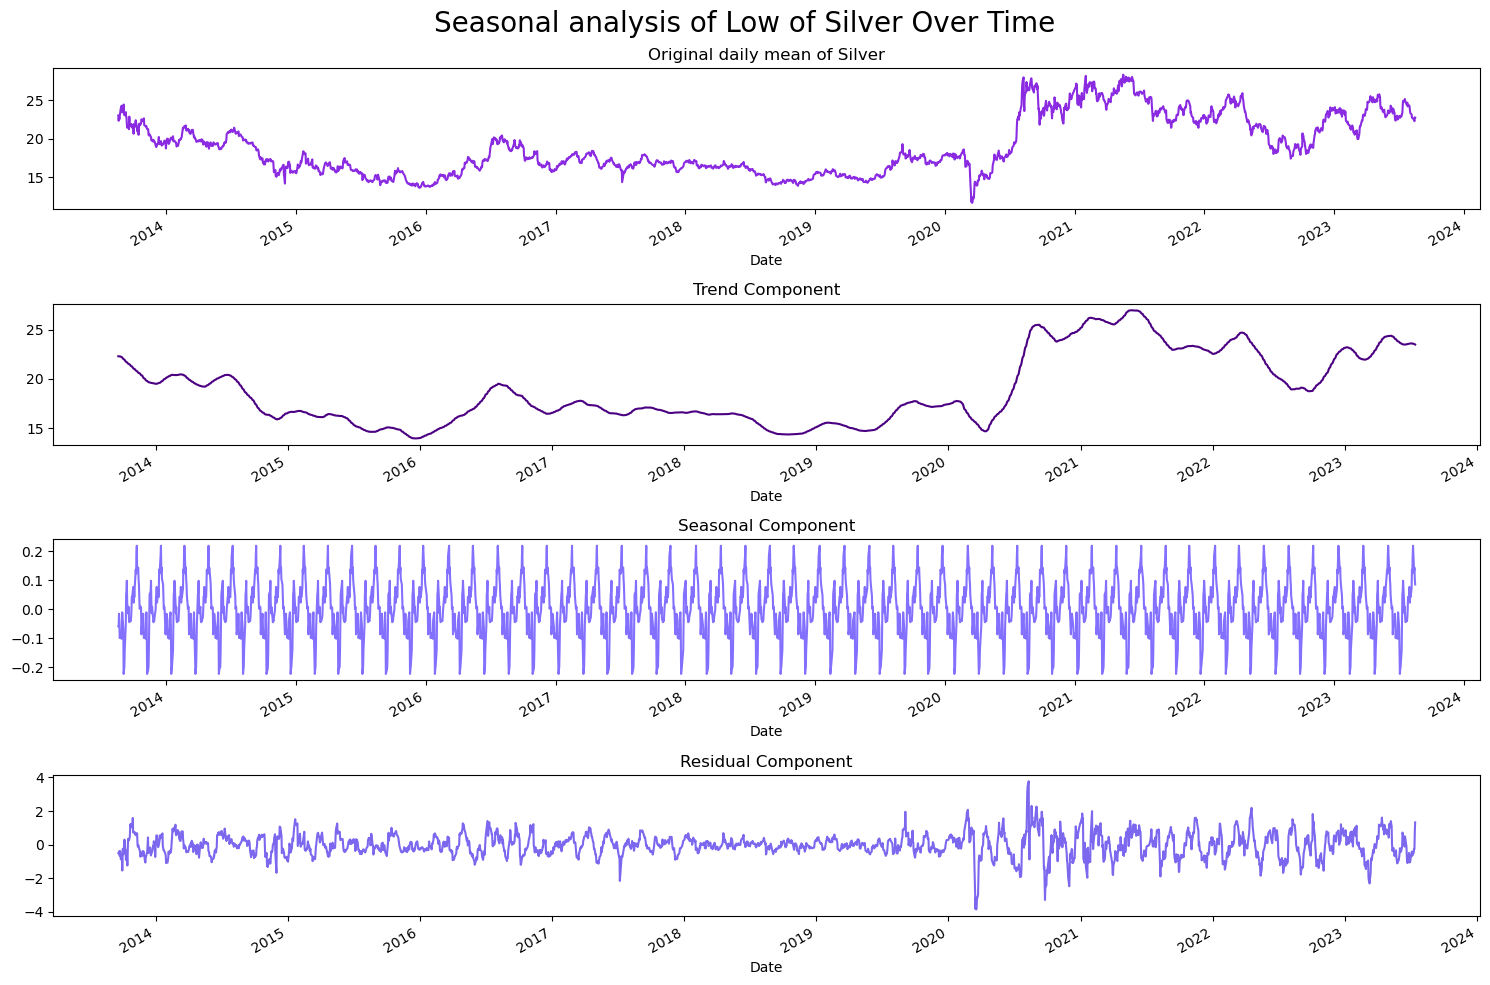

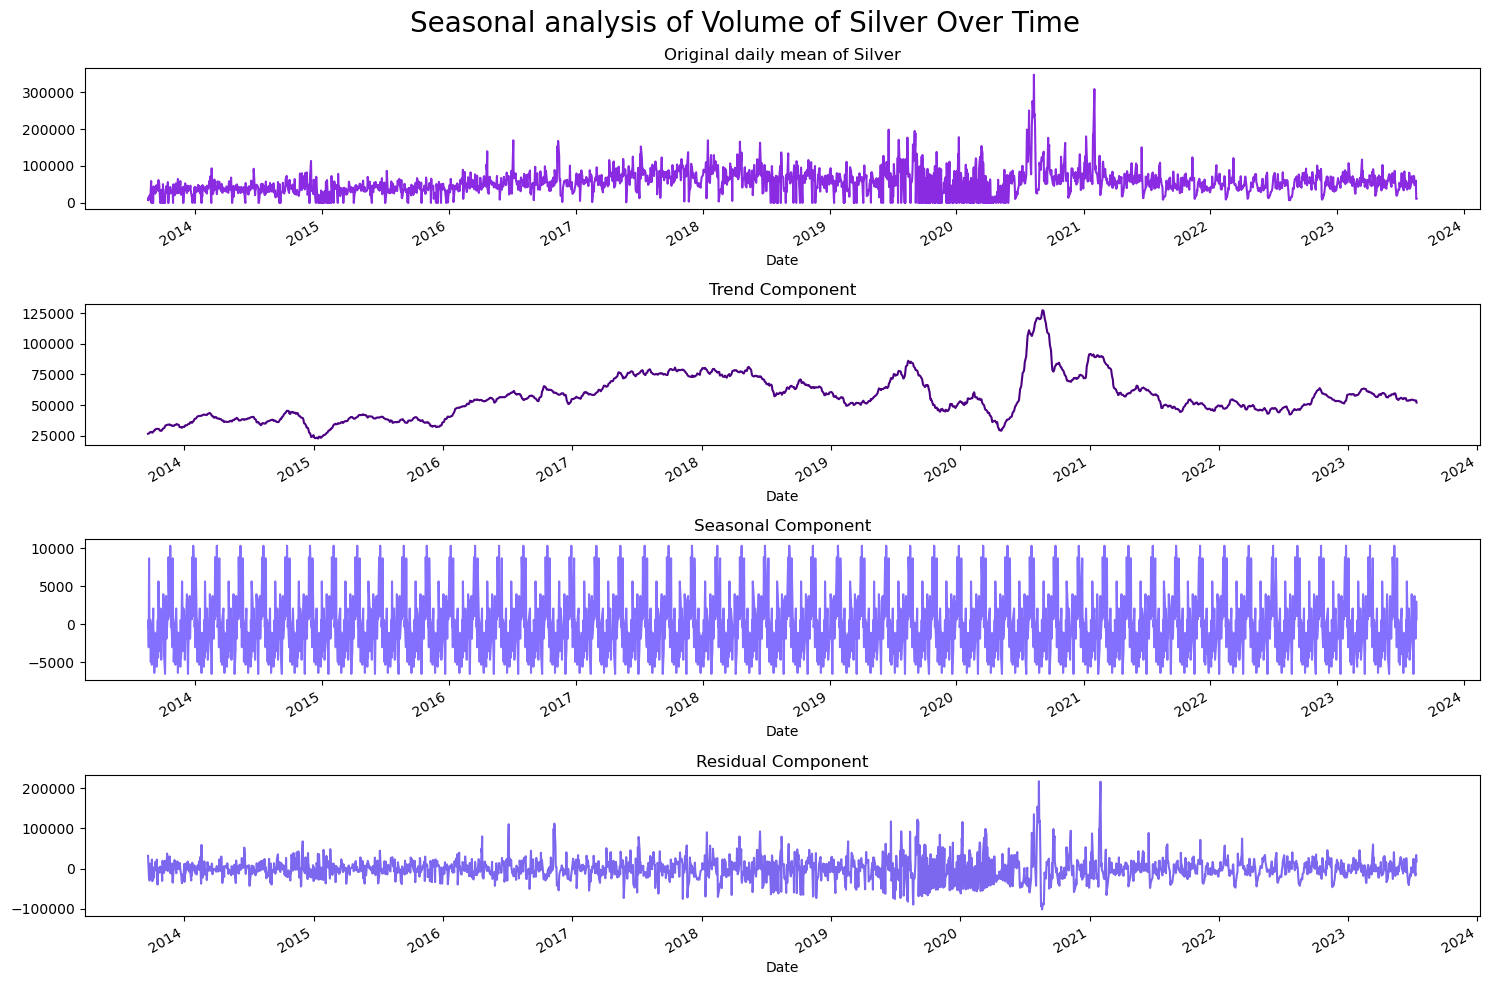

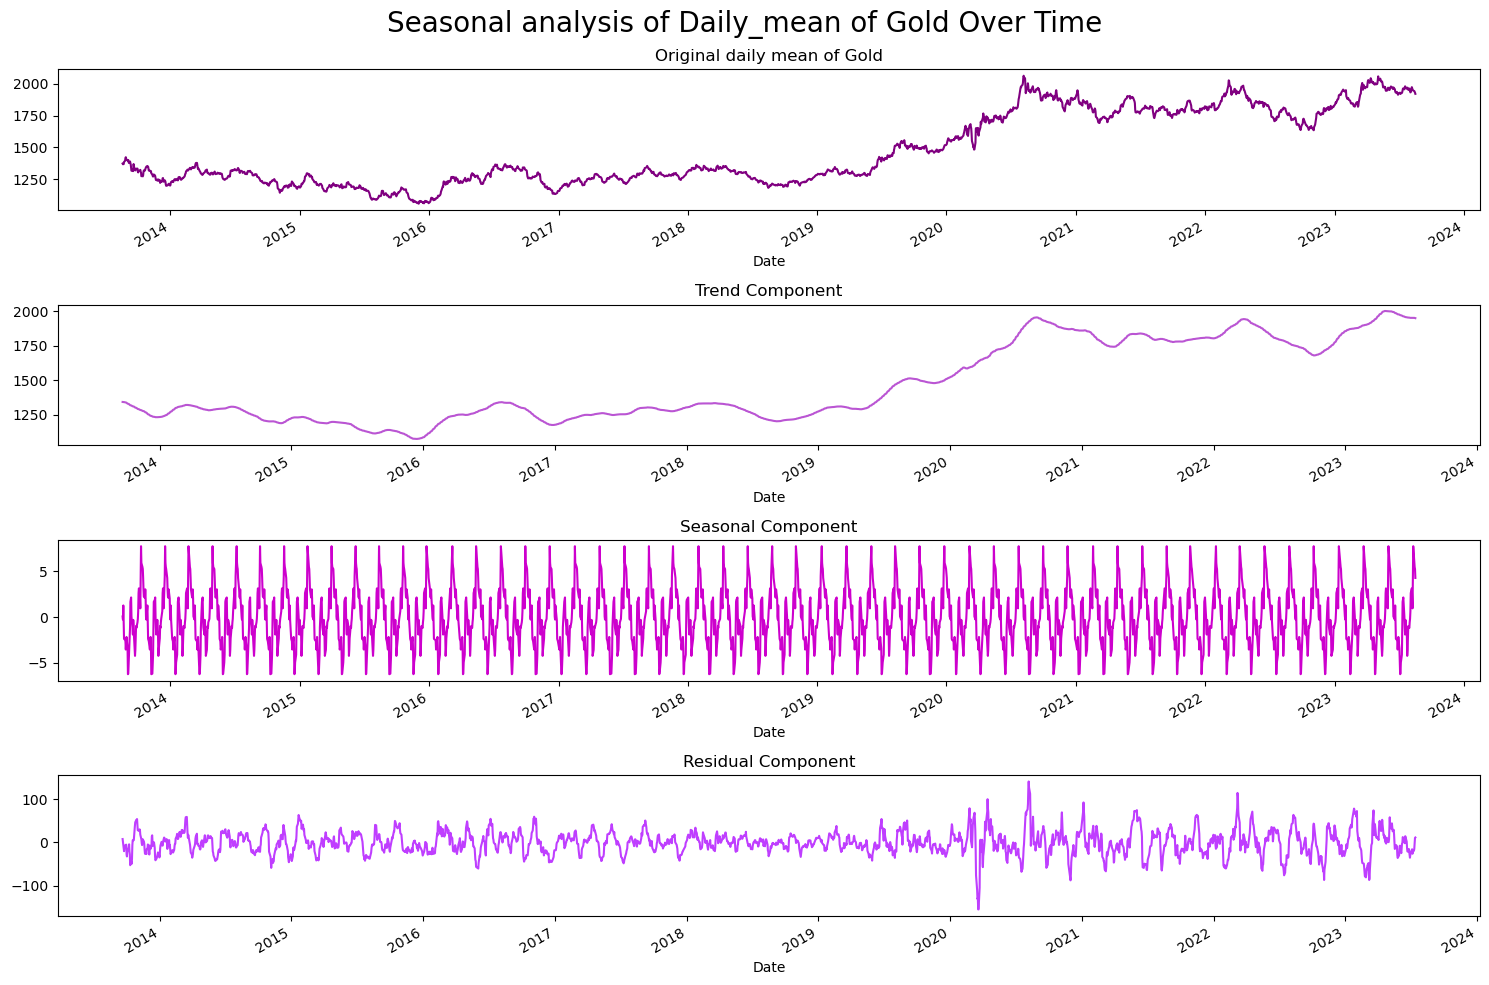

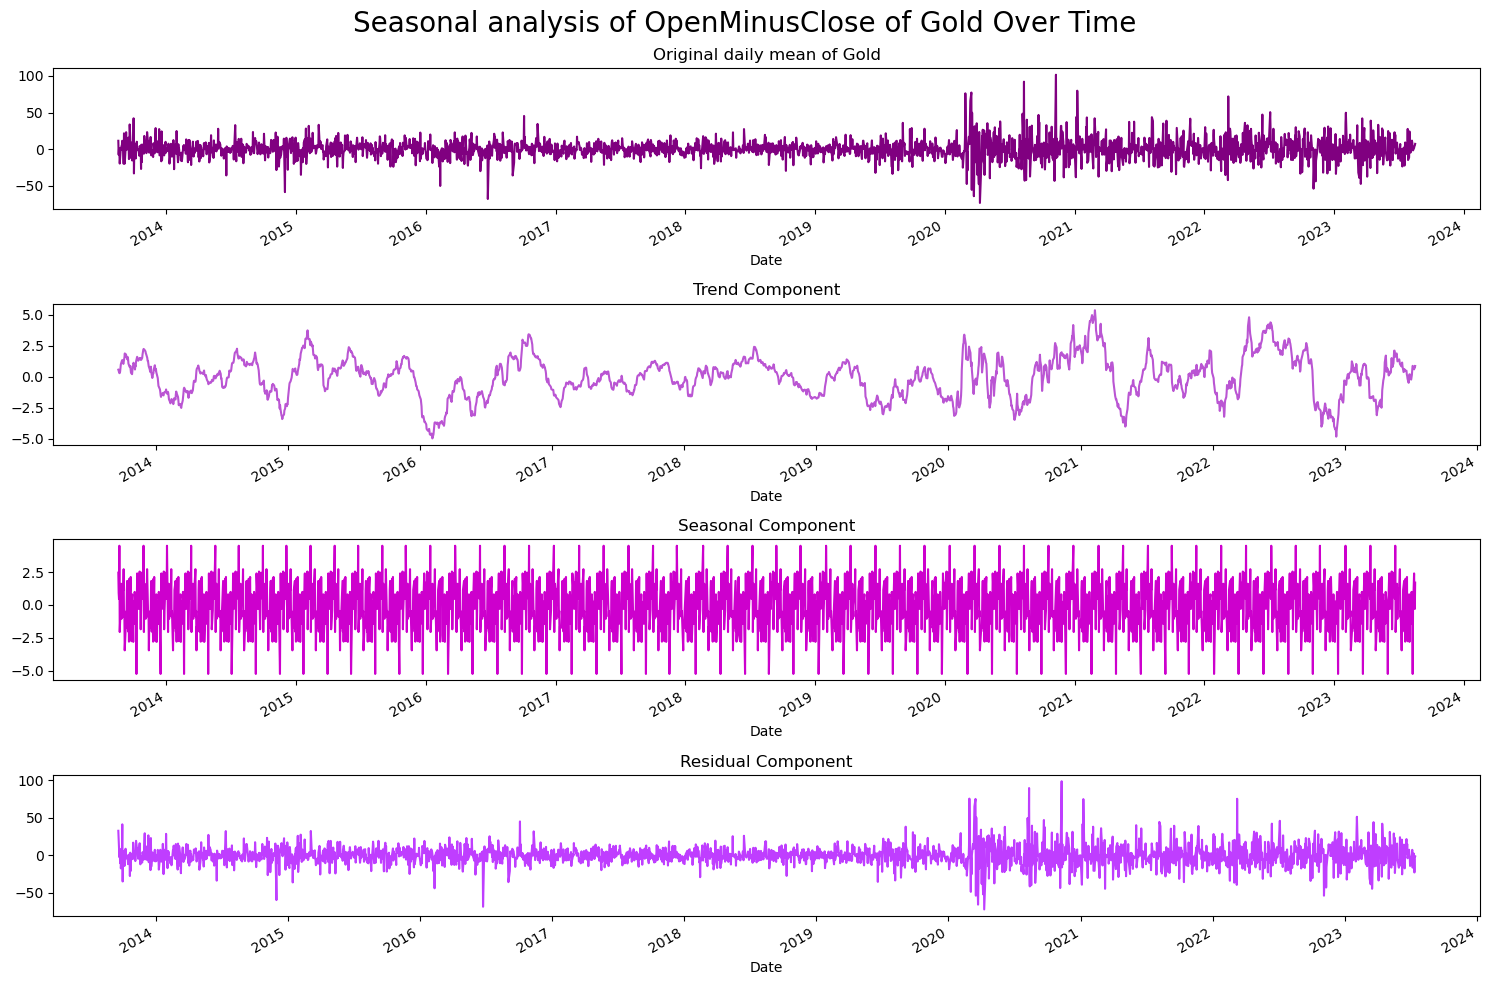

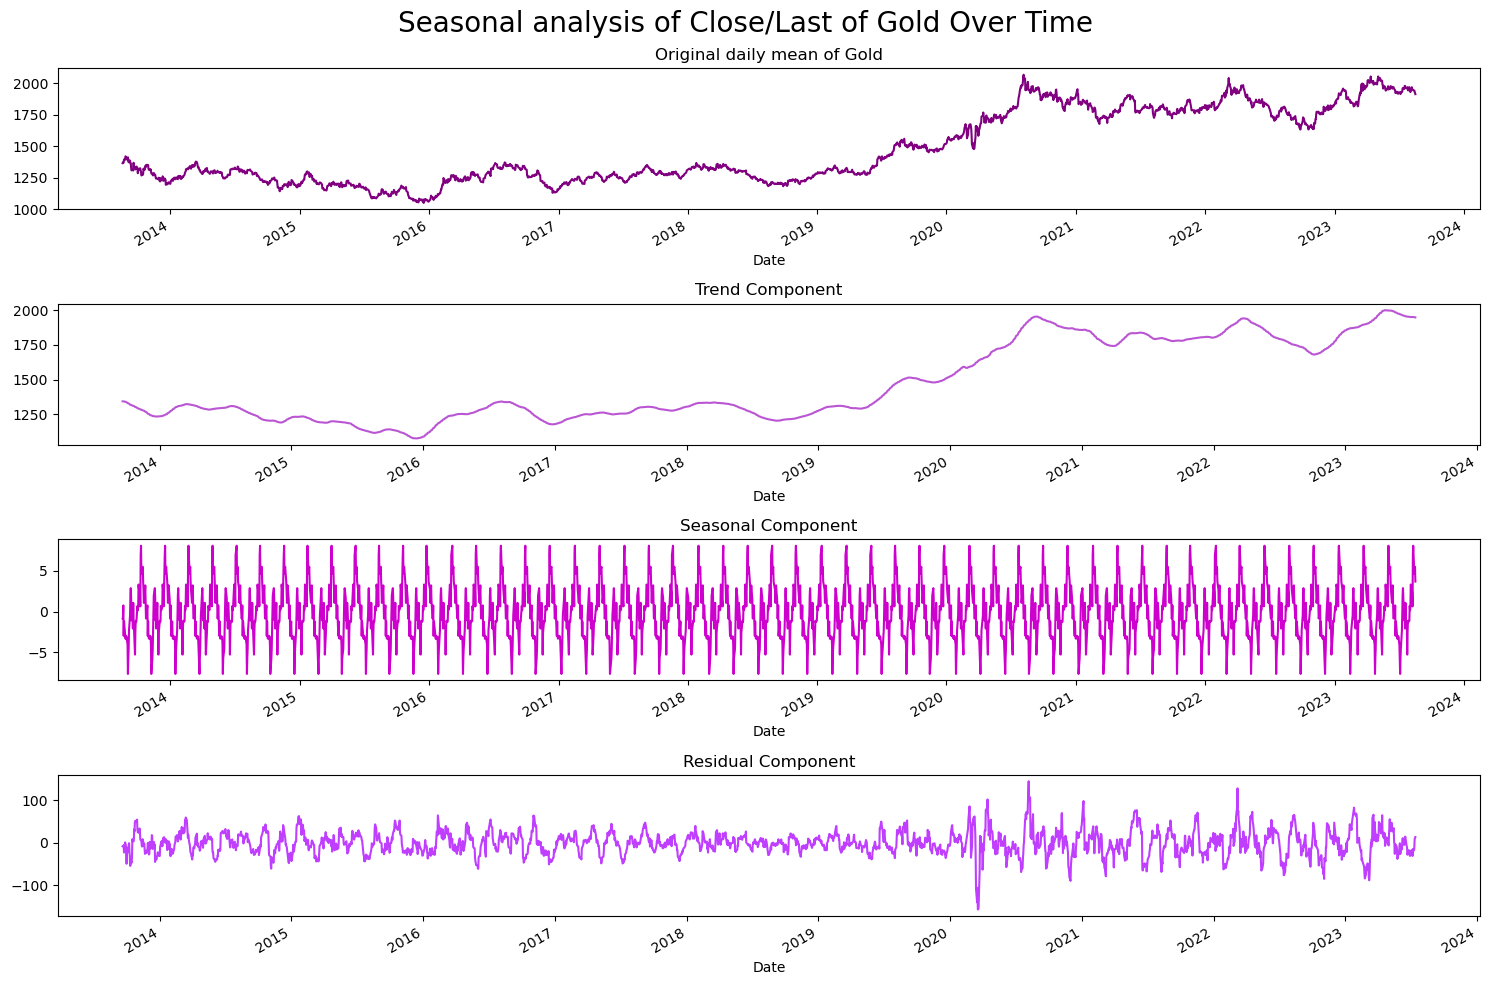

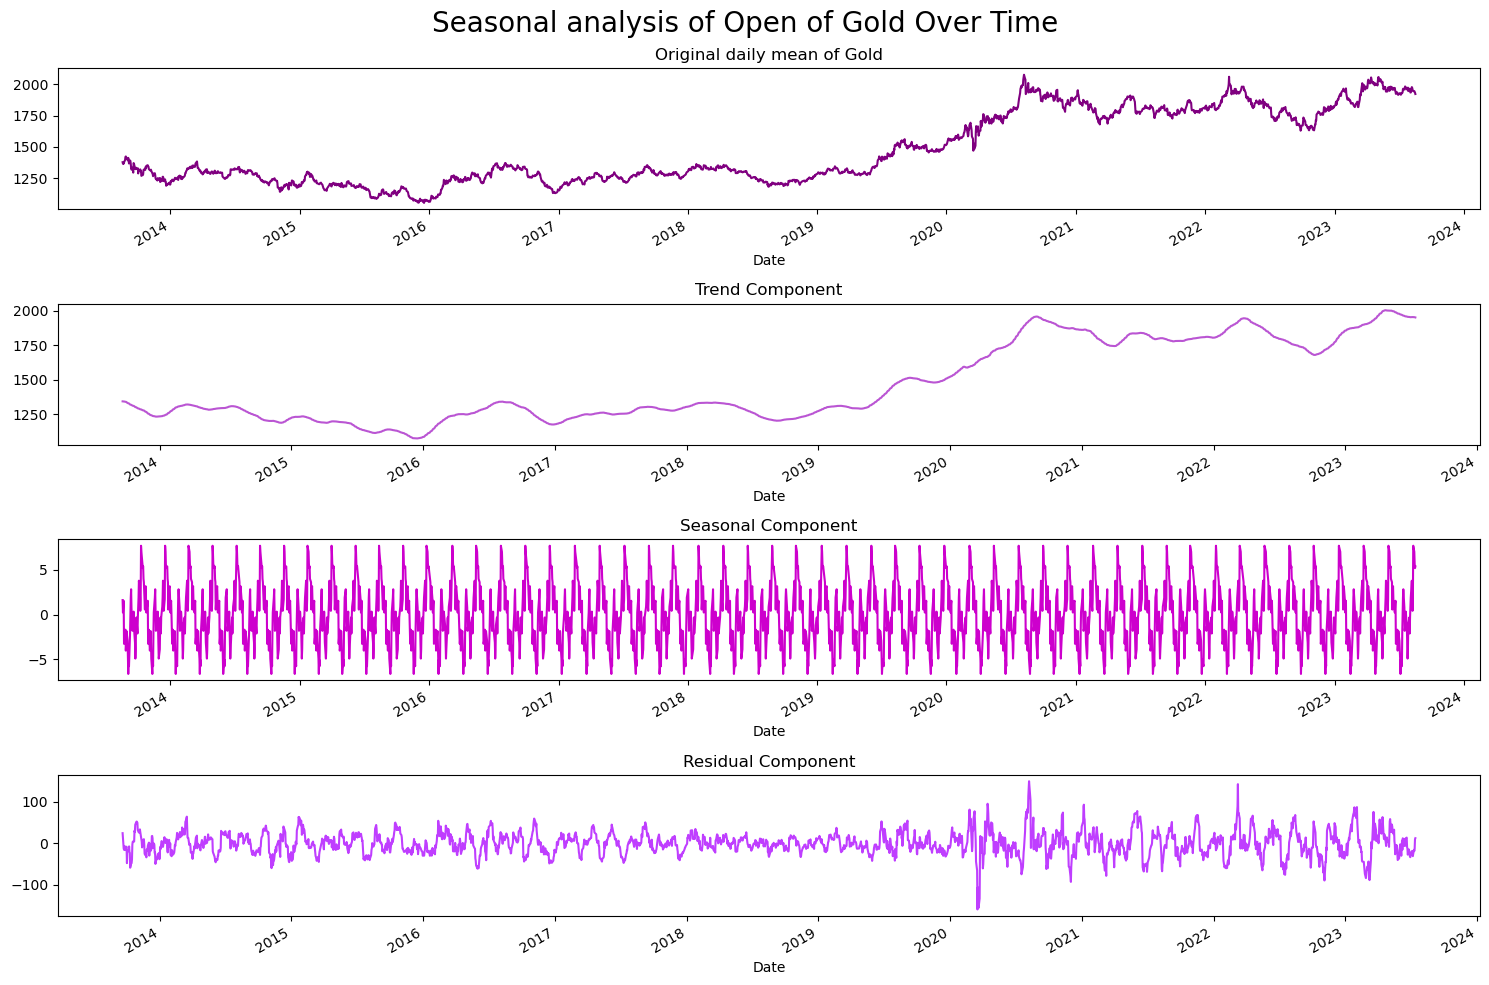

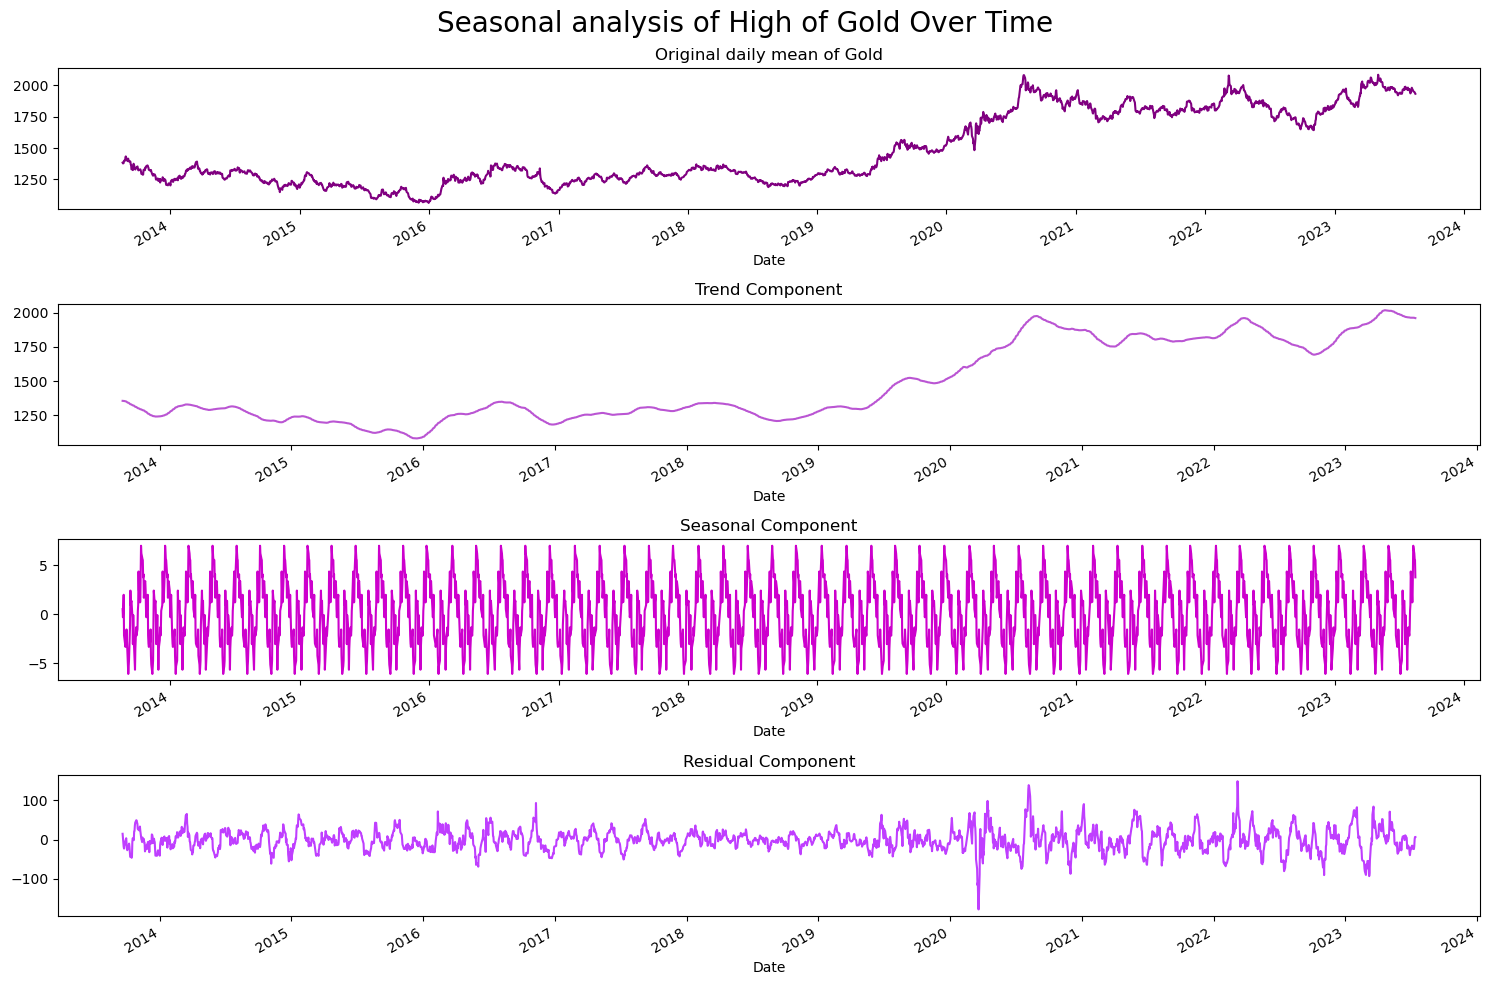

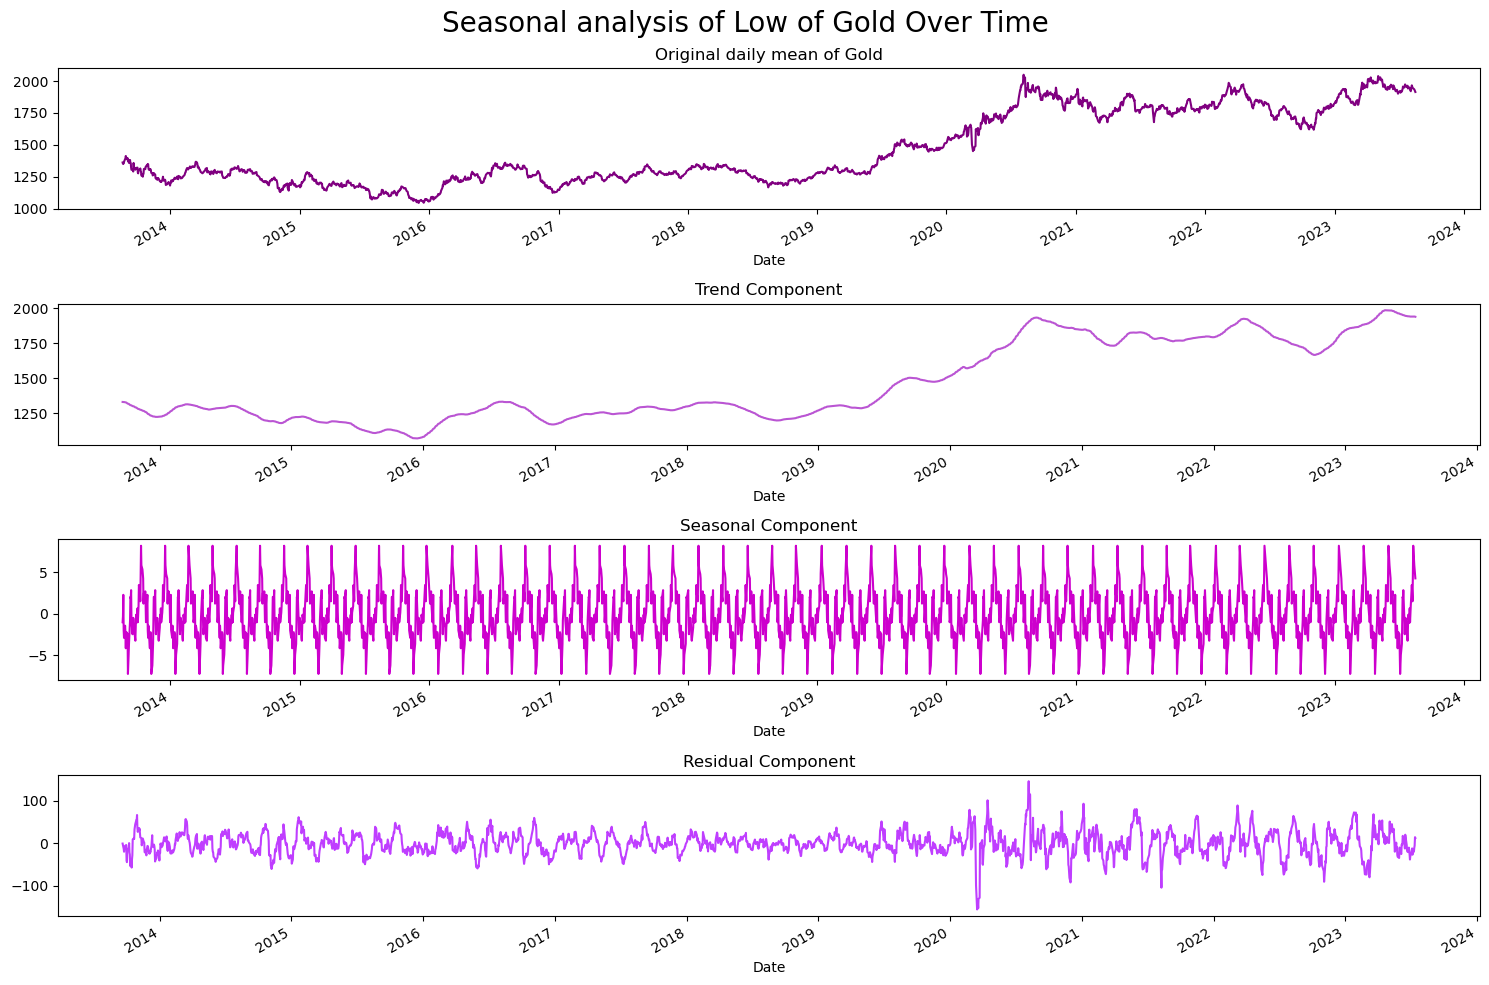

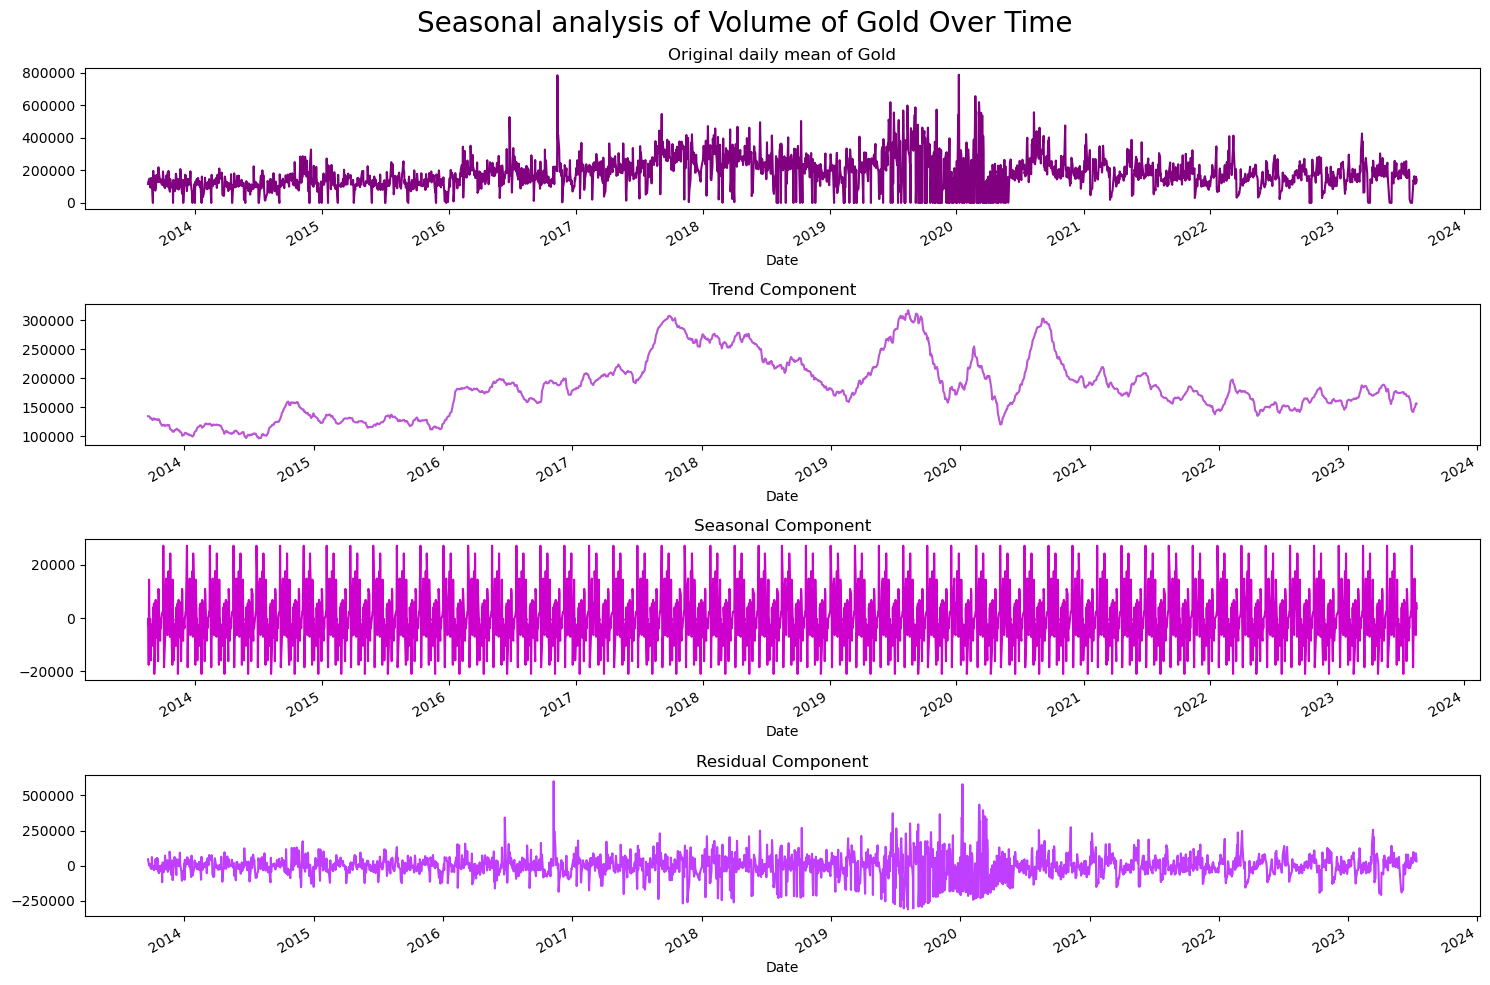

In [43]:
gold_silver = [0, 1]
names = ['Silver','Gold']
color = [['blueviolet', '#4B0082', '#8470FF', '#7B68EE'], ['purple', '#BA55D3', '#CD00CD', '#BF3EFF']]

y_valor = ['Daily_mean', 'OpenMinusClose', 'Close/Last', 'Open', 'High', 'Low', 'Volume']

for material in gold_silver:
    for y_v in y_valor:
        # Decomposing the overall unemployment rate using the correct parameters
        result = seasonal_decompose(all_data[all_data['Gold/Silver']==material].set_index('Date')[y_v], model='additive', period=48)
        #I notice that it has a weekly trend, so, I will use a period of 48

        # Plotting the decomposition results
        fig, axes = plt.subplots(4, 1, figsize=(15, 10))
        
        fig.suptitle('Seasonal analysis of '+y_v+' of '+names[material]+' Over Time', fontsize=20)
        result.observed.plot(ax=axes[0], title='Original daily mean of '+names[material], c = color[material][0])
        result.trend.plot(ax=axes[1], title='Trend Component', c=color[material][1])
        result.seasonal.plot(ax=axes[2], title='Seasonal Component', c=color[material][2])
        result.resid.plot(ax=axes[3], title='Residual Component', c = color[material][3])
        
        plt.tight_layout()
        plt.show()